# <font color='#6A5ACD'>Анализ рынка заведений общественного питания Москвы</font>

- Автор: Романовкская Кристина
- Дата: 10.02.2025

## <font color='#00FFFF'> Цели и задачи проекта</font>

### Цель:
Провести исследовательский анализ данных рынка заведений общественного питания Москвы.   

### Задачи:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбце `rating` с другими данными.
4. Сформулировать выводы по проведённому анализу.

## <font color='#00FFFF'> Описание данных</font>

Для анализа поступили данные о клиентах банка «Метанпром». Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` —  информация о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info.csv`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    *   0 — заведение не является сетевым,
    *   1 — заведение является сетевым;
- `seats` — количество посадочных мест.

### Описание датасета `rest_price.csv`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    *   «Средний счёт: 1000–1500 ₽»,
    *   «Цена чашки капучино: 130–220 ₽»,
    *   «Цена бокала пива: 400–600 ₽», и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    *   Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений,
    *   Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число,
    *   Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    *   Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений,
    *   Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число,
    *   Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## <font color='#00FFFF'> Содержимое проекта</font>

1. <a href="#part1">Загрузка данных и знакомство с ними.</a>
2. <a href="#part2">Предобработка данных:</a>
    1) <a href="#part3">Проверка корректности типов данных;</a>
    2) <a href="#part4">Изучение пропущенных значений;</a>
    3) <a href="#part5">Проверка данных на явные и неявные дубликаты;</a>
    4) <a href="#part6">Создание новго столбца 'is_24_7'.</a>
3. <a href="#part7">Исследовательский анализ данных:</a>
    1) <a href="#part8">Количество объектов общественного питания по каждой категории;</a>
    2) <a href="#part9">Распределение количества заведений по административным районам Москвы, а также распределение заведений каждой категории в Центральном административном округе Москвы;</a>
    3) <a href="#part10">Соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения;</a>
    4) <a href="#part11">Количество посадочных мест в заведениях;</a>
    5) <a href="#part12">Рейтинг заведений;</a>
    6) <a href="#part13">Находим самую сильную корреляцию с рейтингами заведений;</a>
    7) <a href="#part14">Топ-15 популярных сетевых заведений в Москве;</a>
    8) <a href="#part15">Анализ цен в центральном административном округе и других округах;</a>
    9) <a href="#part16">Анализ времени работы заведений. Определение стоимости чашки кофе в зависимости от расположения или типа заведения.</a>
4. <a href="#part17">Итоговые выводы.</a>

---

## 1. <a href="#part1">Загрузка данных и знакомство с ними </a>

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [300]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции
from phik import phik_matrix

In [301]:
# Выгружаем данные в переменные bank_df и clients_df
info_df = pd.read_csv('/datasets/rest_info.csv')
price_df = pd.read_csv('/datasets/rest_price.csv')

In [302]:
# Выводим первые строки первого датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [303]:
# Выводим первые строки второго датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [304]:
# Выводим информацию о датафрейме info_df
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [305]:
# Выводим информацию о датафрейме price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

<font color='#00FFFF'> Файл rest_info.csv:</font>

Объём данных: 
- 8406 строк и 9 столбцов.

Соответствие описанию: 
- В целом, данные соответствуют описанию. Столбцы name, address, district, category, hours имеют строковый тип (object), rating - тип float64, chain - int64, seats - float64.

Пропуски:
- hours: 536 пропусков (примерно 6.4%). Пропуски могут быть связаны с тем, что у некоторых заведений нет информации о часах работы или эта информация не была собрана.
- seats: 3611 пропусков (примерно 43%). Пропуски могут быть связаны с тем, что у некоторых заведений (например, доставка или еофе с собой) нет посадочных мест, или эта информация не была собрана.

Типы данных: 
- Типы данных соответствуют описанию.

Особенности:
- Столбец seats имеет тип float64, хотя количество мест должно быть целым числом. Это может быть связано с наличием пропущенных значений (NaN).
- В столбце hours содержится строковая информация о часах работы, что может потребовать дальнейшей обработки для анализа.


<font color='#00FFFF'> Файл rest_price.csv:</font>

Объём данных: 4058 строк и 5 столбцов.

Соответствие описанию: 
- Данные соответствуют описанию.

Пропуски:
- price: 743 пропуска (примерно 18.3%). Пропуски могут быть связаны с отсутствием информации о ценовой категории для некоторых заведений.
- avg_bill: 242 пропуска (примерно 6%). Пропуски могут быть связаны с отсутствием информации о среднем чеке для некоторых заведений.
- middle_avg_bill: 909 пропусков (примерно 22.4%). Это ожидаемо, так как этот столбец заполняется только для значений avg_bill, начинающихся с "Средний счёт".
- middle_coffee_cup: 3523 пропуска (примерно 86.8%). Это тоже ожидаемо, так как этот столбец заполняется только для значений avg_bill, начинающихся с "Цена одной чашки капучино".

Типы данных: 
- Типы данных соответствуют описанию.

Особенности:
- В столбце avg_bill содержится строковая информация о среднем чеке, которая требует дальнейшей обработки для анализа. Нужно извлекать числовые значения.
- Большое количество пропусков в столбцах middle_avg_bill и middle_coffee_cup указывает на то, что большая часть информации о среднем чеке в avg_bill представлена не в формате "Средний счёт", "Цена одной чашки капучино" или "Цена бокала пива", но столбцы с ценами были созданы только по первым двум, а столбец "Средняя цена пива" отсутствует.


<font color='#00FFFF'> Общие выводы:</font>

- Оба датафрейма имеют столбец id, который является общим ключом для объединения данных.
- Столбцы hours и avg_bill содержат текстовую информацию, которую необходимо будет преобразовать для количественного анализа.

---

### Подготовка единого датафрейма

In [306]:
# Объединяем датафреймы по столбцу 'id'
df = info_df.merge(price_df, on='id', how='left')

In [307]:
# Выводим информацию об объединенном датафрейме
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


None

In [308]:
# Выводим первые строки для проверки
display(df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. <a href="#part2">Предобработка данных</a>

In [309]:
# Обработка 'seats', приведение к int
#df['seats'] = df['seats'].str.replace(',', '', regex=True)  # Remove commas if present
df['seats'] = df['seats'].replace('', np.nan) # Преобразуем пустые строки в NaN
df['seats'] = df['seats'].astype('Int64')  # Преобразуем в Int64 (с поддержкой NaN)

In [310]:
# Вывод информации об обновленном датафрейме
print("После преобразования типов:")
display(df.info())

После преобразования типов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int64(1), float64(3), int64(1), object(8)
memory usage: 862.1+ KB


None

In [311]:
# Вывод первых строк
display(df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN


In [312]:
# Расчет количества пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

In [313]:
# Расчет относительной доли пропущенных значений
missing_values_percent = (missing_values / len(df)) * 100


In [314]:
# Создание DataFrame для отображения результатов
missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percent Missing': missing_values_percent})

# Сортировка по убыванию доли пропущенных значений
missing_data = missing_data.sort_values(by='Percent Missing', ascending=False)

# Округление процентов до двух знаков после запятой
missing_data['Percent Missing'] = missing_data['Percent Missing'].round(2)

print("Количество и процент пропущенных значений в каждом столбце:")
display(missing_data)

Количество и процент пропущенных значений в каждом столбце:


,Missing Values,Percent Missing
middle_coffee_cup,7871,93.64
middle_avg_bill,5257,62.54
price,5091,60.56
avg_bill,4590,54.60
seats,3611,42.96
hours,536,6.38
district,0,0.00
category,0,0.00
name,0,0.00
id,0,0.00


In [315]:
# Расчет процента пропущенных значений для каждого столбца
missing_percentage = df.isnull().sum() / len(df) * 100

# Создаем DataFrame с процентом пропущенных значений
missing_data = pd.DataFrame(missing_percentage, columns=['Percent Missing'])

# Транспонируем DataFrame, чтобы столбцы стали строками (для heatmap)
missing_data = missing_data.T

# Стилизация DataFrame для более наглядного отображения
styled_missing_data = missing_data.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")
print("Процент пропущенных значений:")
display(styled_missing_data)

Процент пропущенных значений:


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
Percent Missing,0.00,0.00,0.00,0.00,0.00,6.38,0.00,0.00,42.96,60.56,54.60,62.54,93.64


#### Гипотезы о причинах пропусков:

'hours': 
- информация о часах работы могла быть не указана владельцами заведений или не найдена в открытых источниках.

'price': 
- информация о ценовой категории могла отсутствовать, если заведение не предоставило эту информацию или она не была определена.

'avg_bill', 'middle_avg_bill', 'middle_coffee_cup':  
- эти данные связаны с ценами. Пропуск может быть связан с тем, что заведение не предоставляет информацию о среднем чеке или цене кофе, или же эта информация не была собрана.

<Figure size 600x400 with 0 Axes>

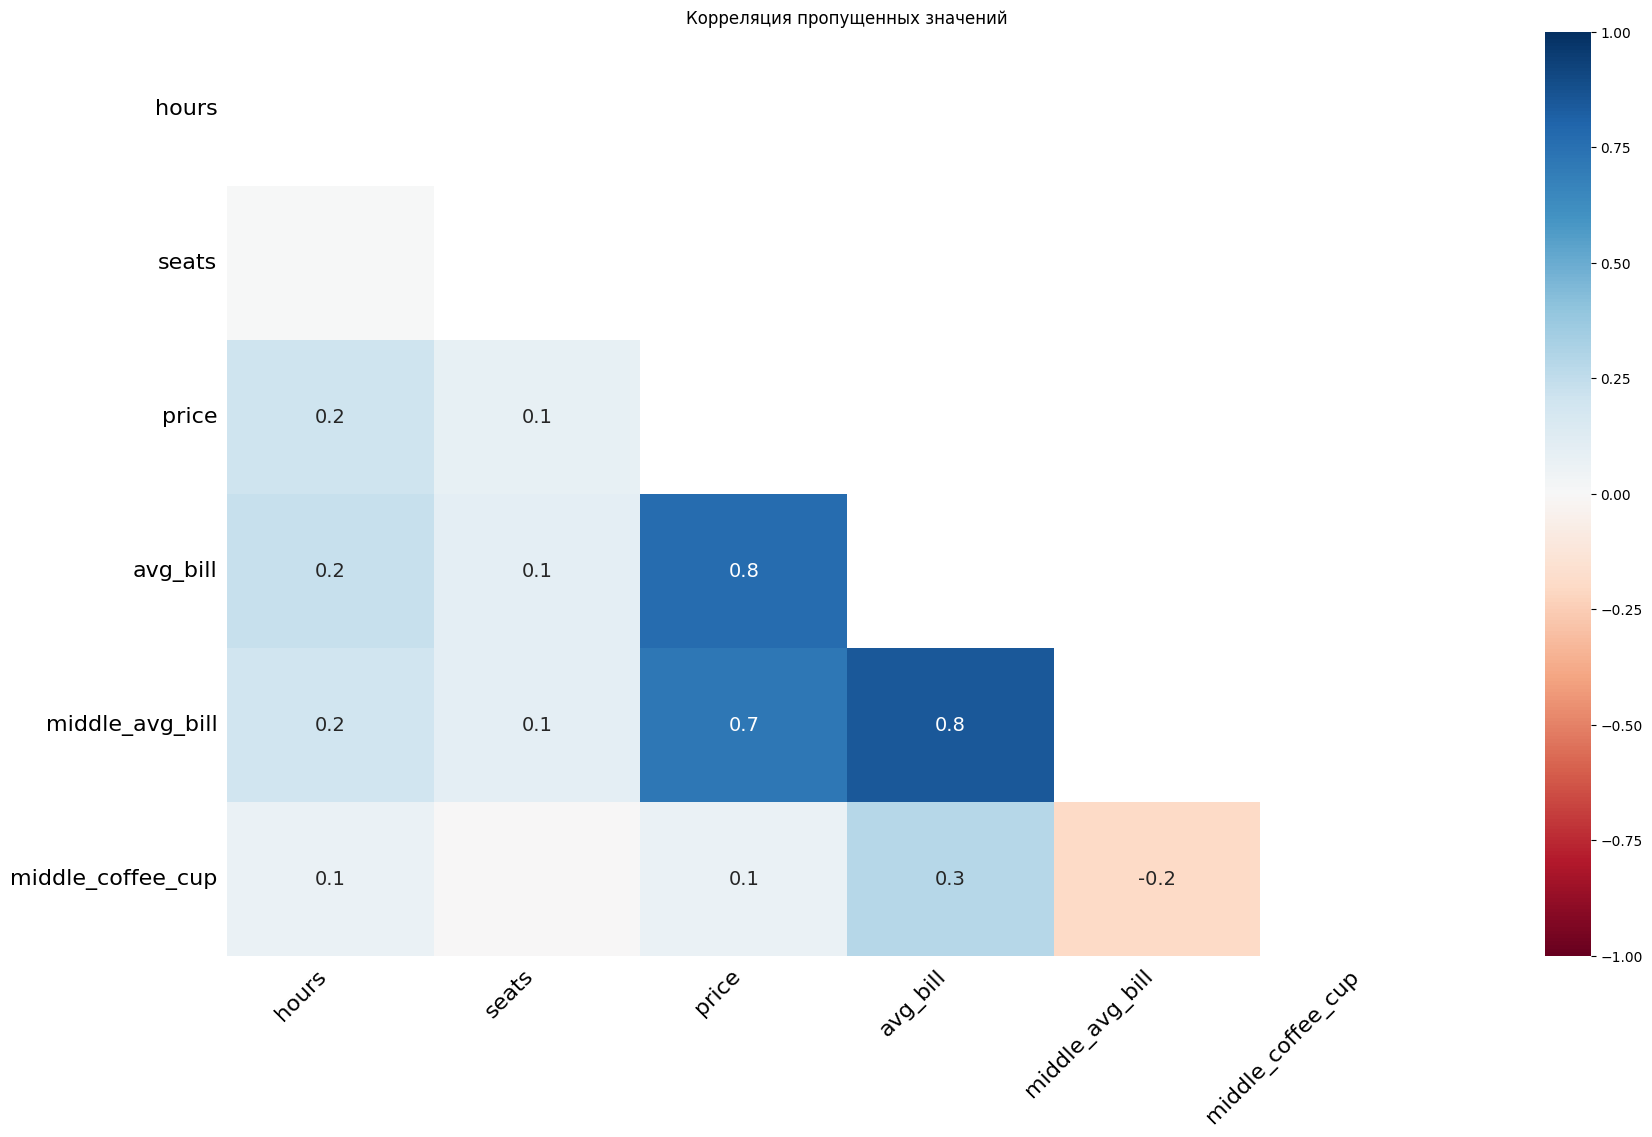

In [316]:
# Визуализация корреляции пропущенных значений с помощью missingno
plt.figure(figsize=(6, 4))
msno.heatmap(df)
plt.title("Корреляция пропущенных значений")
plt.show()

In [317]:
# Проверка на явные дубликаты
print("Количество явных дубликатов:", df.duplicated().sum())

Количество явных дубликатов: 0


In [318]:
# Нормализация текстовых данных (столбец 'name')
df['name_normalized'] = df['name'].str.lower().str.strip()

In [319]:
# Проверка на неявные дубликаты по названию и адресу
duplicates_by_name_address = df.groupby(['name_normalized', 'address']).size().reset_index(name='count')
duplicates_by_name_address = duplicates_by_name_address[duplicates_by_name_address['count'] > 1]
print("Неявные дубликаты по названию и адресу:")
display(duplicates_by_name_address)

Неявные дубликаты по названию и адресу:


,name_normalized,address,count
1454,more poke,"Москва, Волоколамское шоссе, 11, стр. 2",2
6196,раковарня клешни и хвосты,"Москва, проспект Мира, 118",2
7485,хлеб да выпечка,"Москва, Ярцевская улица, 19",2


In [320]:
# В данном примере удаляем дубликаты, оставляя только первую запись
df = df.drop_duplicates(subset=['name_normalized', 'address'], keep='first')

In [321]:
# Проверка после обработки неявных дубликатов
duplicates_by_name_address = df.groupby(['name_normalized', 'address']).size().reset_index(name='count')
duplicates_by_name_address = duplicates_by_name_address[duplicates_by_name_address['count'] > 1]
print("Неявные дубликаты по названию и адресу после обработки:")
display(duplicates_by_name_address)

Неявные дубликаты по названию и адресу после обработки:


,name_normalized,address,count


In [322]:
# Удаление вспомогательного столбца 'name_normalized'
df = df.drop('name_normalized', axis=1)

In [323]:
# Вывод первых строк обработанного датафрейма
display(df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN


#### Для дальнейшей работы создаём <a href="#part6">столбец `is_24_7`</a> с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [324]:
# Создание столбца is_24_7 

# Проверка на наличие обоих слов, приводим к нижнему регистру
contains_daily = df['hours'].str.lower().str.contains('ежедневно', na=False)
contains_24_7 = df['hours'].str.lower().str.contains('круглосуточно', na=False)

In [325]:
# Объединение условий
df['is_24_7'] = contains_daily & contains_24_7

In [326]:
# Посмотреть количество True и False в is_24_7
print(" True и False в столбце 'is_24_7':")
display(df['is_24_7'].value_counts())

 True и False в столбце 'is_24_7':


is_24_7
False    7673
True      730
Name: count, dtype: int64

In [327]:
# Вывод информации об обновленном датафрейме
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8403 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8403 non-null   object 
 1   name               8403 non-null   object 
 2   category           8403 non-null   object 
 3   address            8403 non-null   object 
 4   district           8403 non-null   object 
 5   hours              7868 non-null   object 
 6   rating             8403 non-null   float64
 7   chain              8403 non-null   int64  
 8   seats              4792 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8403 non-null   bool   
dtypes: Int64(1), bool(1), float64(3), int64(1), object(8)
memory usage: 935.5+ KB


None

In [328]:
# Вывод первых строк
display(df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


---

### Промежуточный вывод

In [329]:
# Промежуточный вывод
initial_rows = info_df.shape[0]
final_rows = df.shape[0]
removed_rows = initial_rows - final_rows
percentage_removed = (removed_rows / initial_rows) * 100

print("Промежуточный вывод:")
print(f"Изначальное количество строк: {initial_rows}")
print(f"Количество строк после предобработки: {final_rows}")
print(f"Количество удаленных строк: {removed_rows}")
print(f"Доля удаленных строк: {percentage_removed:.2f}%")

Промежуточный вывод:
Изначальное количество строк: 8406
Количество строк после предобработки: 8403
Количество удаленных строк: 3
Доля удаленных строк: 0.04%


В процессе предобработки было удалено 0.04% данных, что составляет 3 строки. Это произошло из-за удаления неявных дубликатов, найденных по совпадению названия и адреса заведения.

## 3. <a href="#part7">Исследовательский анализ данных</a>

---

### <a href="#part8">Задача 1</a>

Определим какие категории заведений представлены в данных. Исследуем количество объектов общественного питания по каждой категории.

In [330]:
# Какие категории заведений представлены в данных?
print("Уникальные категории заведений:")
display(df['category'].unique())

Уникальные категории заведений:


array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [331]:
# Исследуem количество объектов общественного питания по каждой категории.
category_counts = df['category'].value_counts().sort_values(ascending=False)
print("Количество объектов общественного питания по каждой категории:")
display(category_counts)

Количество объектов общественного питания по каждой категории:


category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

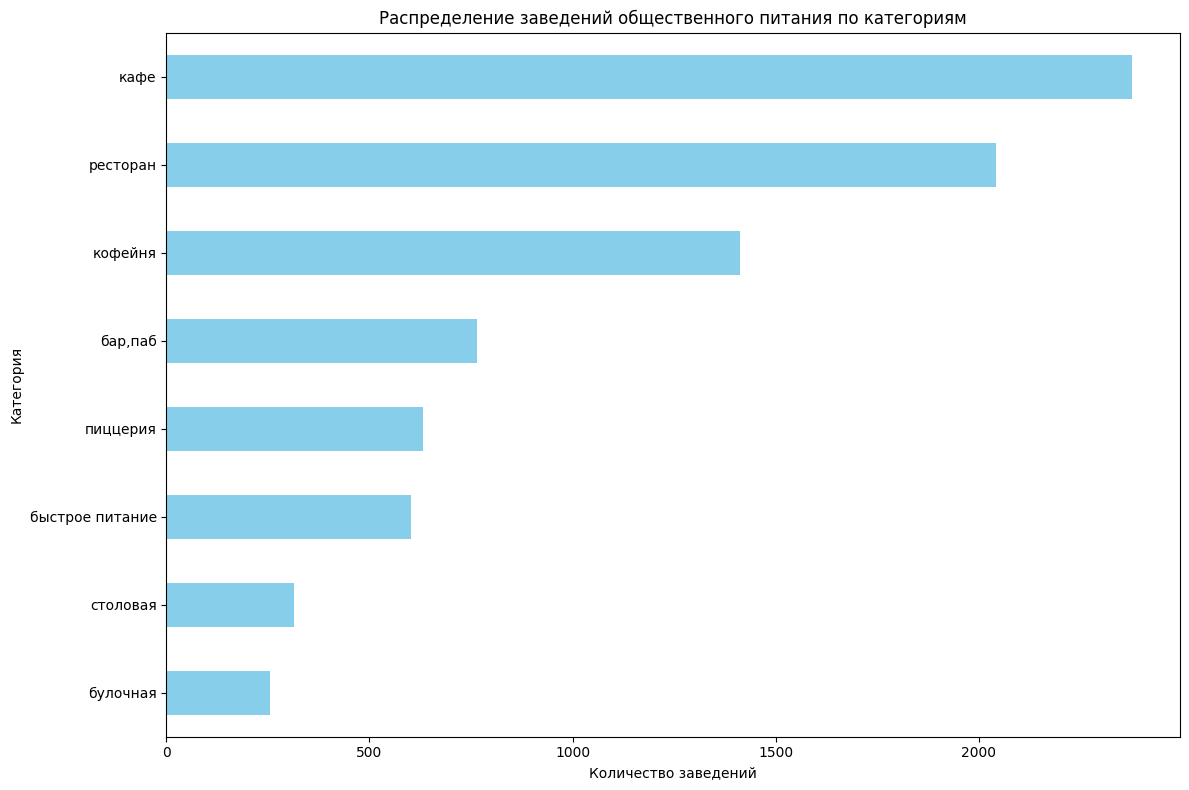

In [332]:
# Визуализация (горизонтальный bar plot)
plt.figure(figsize=(12, 8))  # Увеличиваем размер графика для лучшей читаемости
category_counts.plot(kind='barh', color='skyblue')
plt.title('Распределение заведений общественного питания по категориям')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.gca().invert_yaxis()  # Инвертируем ось y для более удобного чтения
plt.tight_layout()
plt.show()

Выводы:
- В данных представлено 8 уникальных категорий заведений общественного питания: кафе, ресторан, кофейня, бар/паб, пиццерия, быстрое питание, столовая и булочная. 
- Наибольшее количество заведений относится к категории "кафе" (2378), за ними следуют "ресторан" (2043) и "кофейня" (1413). 
- Наименьшее количество заведений представлено в категориях "булочная" (256) и "столовая" (315). Распределение заведений по категориям визуализировано на графике.

---

### <a href="#part9">Задача 2</a>
Анализируем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [333]:
# Какие административные районы Москвы присутствуют в данных?
print("Уникальные административные районы:")
display(df['district'].unique())

Уникальные административные районы:


array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [334]:
# Распределение количества заведений по административным районам Москвы
district_counts = df['district'].value_counts().sort_values(ascending=False)
print("Распределение количества заведений по административным районам:")
display(district_counts)

Распределение количества заведений по административным районам:


district
Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

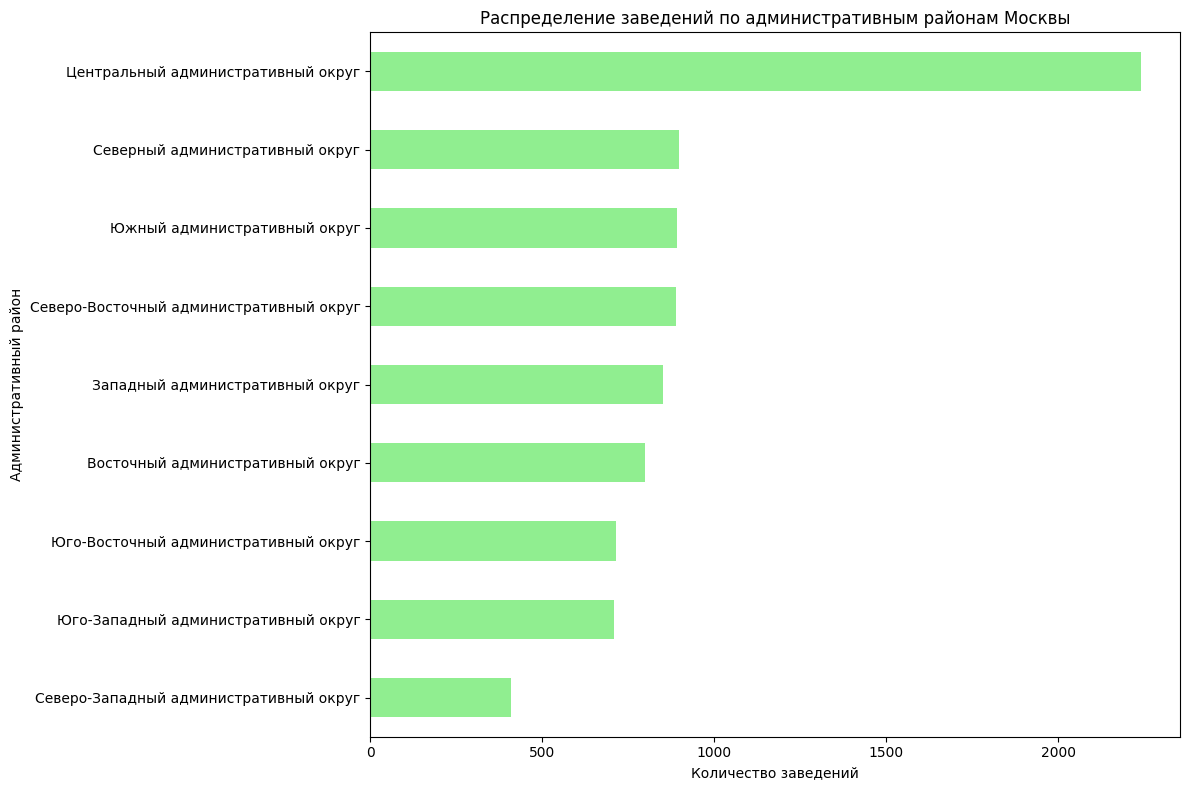

In [335]:
# Визуализация распределения по районам (горизонтальный bar plot)
plt.figure(figsize=(12, 8))
district_counts.plot(kind='barh', color='lightgreen')
plt.title('Распределение заведений по административным районам Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Распределение по районам:
- Наибольшая концентрация заведений общественного питания наблюдается в Центральном административном округе (ЦАО), значительно опережая другие округа. Это отражает его роль как делового, туристического и культурного центра Москвы. 
- Далее следуют Северный, Южный и Северо-Восточный округа, имеющие примерно одинаковое количество заведений. 
- Наименьшее количество заведений - в Северо-Западном округе.

In [336]:
# Распределение заведений каждой категории в Центральном административном округе Москвы
central_district = df[df['district'] == 'Центральный административный округ']
category_counts_central = central_district['category'].value_counts().sort_values(ascending=False)
print("Распределение заведений каждой категории в Центральном административном округе:")
display(category_counts_central)

Распределение заведений каждой категории в Центральном административном округе:


category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

In [337]:
# Исключаем Центральный округ из общего DataFrame
df_no_central = df[df['district'] != 'Центральный административный округ']

In [338]:
# Считаем распределение категорий по всей Москве без учета центра
category_counts_no_central = df_no_central['category'].value_counts().sort_values(ascending=False)

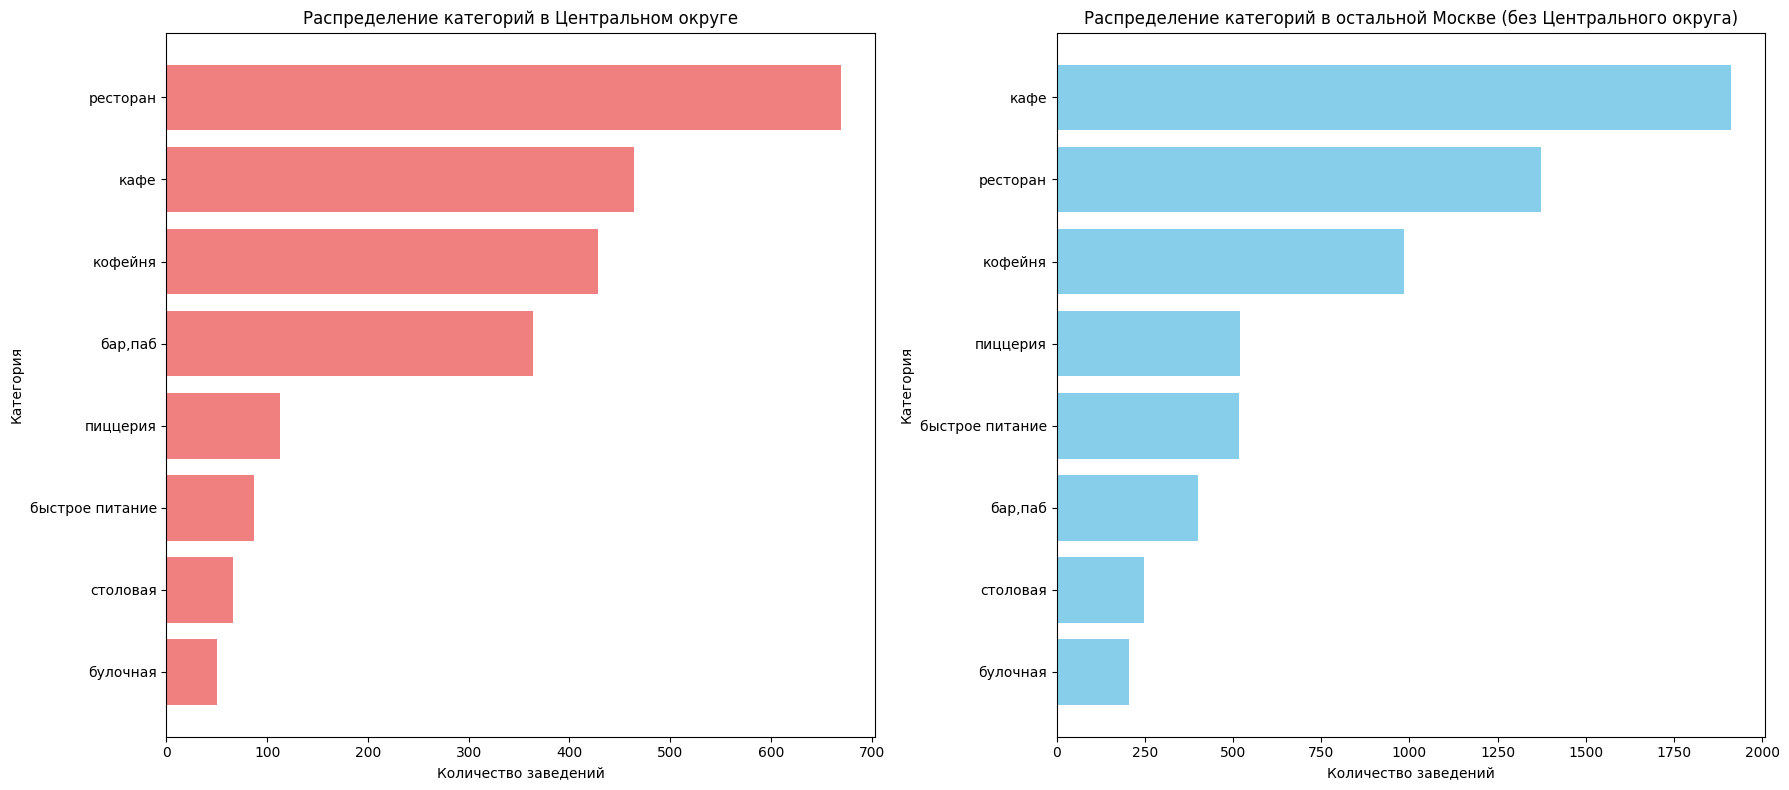

In [339]:
# Создаем subplot для сравнения
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) 

# График для Центрального округа (ЯВНОЕ построение графика)
categories = category_counts_central.index.tolist()
values = category_counts_central.values.tolist()

axes[0].barh(categories, values, color='lightcoral')
axes[0].set_title('Распределение категорий в Центральном округе')
axes[0].set_xlabel('Количество заведений')
axes[0].set_ylabel('Категория')
axes[0].invert_yaxis()

# График для остальной Москвы (ЯВНОЕ построение графика)
categories_no_central = category_counts_no_central.index.tolist()
values_no_central = category_counts_no_central.values.tolist()

axes[1].barh(categories_no_central, values_no_central, color='skyblue')
axes[1].set_title('Распределение категорий в остальной Москве (без Центрального округа)')
axes[1].set_xlabel('Количество заведений')
axes[1].set_ylabel('Категория')
axes[1].invert_yaxis()


plt.tight_layout()
plt.show()

Сравнение распределения категорий (ЦАО vs. остальная Москва):
- В ЦАО относительно выше доля ресторанов, кофеен и баров/пабов, что может быть связано с более высокой концентрацией офисных работников, туристов и более высокой покупательной способностью населения.
- В остальной Москве относительно выше доля кафе и заведений быстрого питания, что может отражать ориентацию на более массовый сегмент и более доступные цены.
- Процент булочных и столовых примерно пропорционален.

In [340]:
# Расчет относительной доли
total_central = category_counts_central.sum()
central_percentage = round((category_counts_central / total_central) * 100, 2)

total_no_central = category_counts_no_central.sum()
no_central_percentage = round((category_counts_no_central / total_no_central) * 100, 2)

# Объединение в один DataFrame для сравнения
comparison_df = pd.DataFrame({'Central (%)': central_percentage,
                               'No Central (%)': no_central_percentage})

# Сортировка по убыванию доли в Центральном округе
comparison_df = comparison_df.sort_values(by='Central (%)', ascending=False)

print("Сравнение распределения категорий (в процентах):")
display(comparison_df)

Сравнение распределения категорий (в процентах):


,Central (%),No Central (%)
category,,
ресторан,29.88,22.27
кафе,20.70,31.05
кофейня,19.09,15.99
"бар,паб",16.24,6.49
пиццерия,5.04,8.44
быстрое питание,3.88,8.38
столовая,2.94,4.04
булочная,2.23,3.34


---

### <a href="#part10">Задача 3</a>

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [341]:
# Соотношение сетевых и несетевых заведений в целом
chain_counts = df['chain'].value_counts()
print("Соотношение сетевых и несетевых заведений:")
display(chain_counts)

Соотношение сетевых и несетевых заведений:


chain
0    5200
1    3203
Name: count, dtype: int64

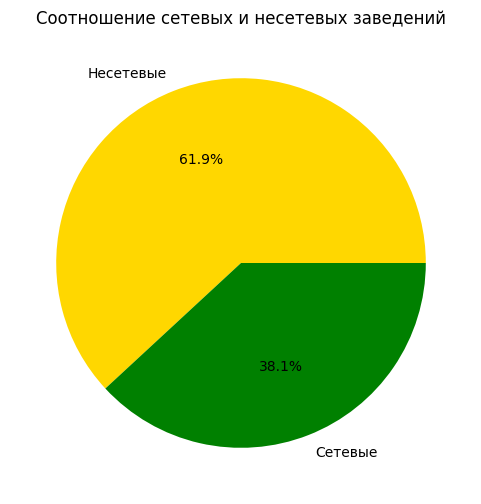

In [342]:
# Визуализация соотношения сетевых и несетевых заведений (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(chain_counts, labels=['Несетевые', 'Сетевые'], autopct='%1.1f%%', colors=['gold', 'green'])
plt.title('Соотношение сетевых и несетевых заведений')
plt.show()

  Преобладание несетевых заведений (61,9%). В целом, в наборе данных преобладают несетевые заведения по сравнению с сетевыми.

In [343]:
# Соотношение сетевых и несетевых заведений в разрезе категорий
category_chain = df.groupby('category')['chain'].value_counts(normalize=True).unstack()
print("Соотношение сетевых и несетевых заведений в разрезе категорий:")
display(category_chain)

Соотношение сетевых и несетевых заведений в разрезе категорий:


chain,0,1
category,,
"бар,паб",0.780105,0.219895
булочная,0.386719,0.613281
быстрое питание,0.615257,0.384743
кафе,0.672276,0.327724
кофейня,0.490446,0.509554
пиццерия,0.478673,0.521327
ресторан,0.642997,0.357003
столовая,0.720635,0.279365


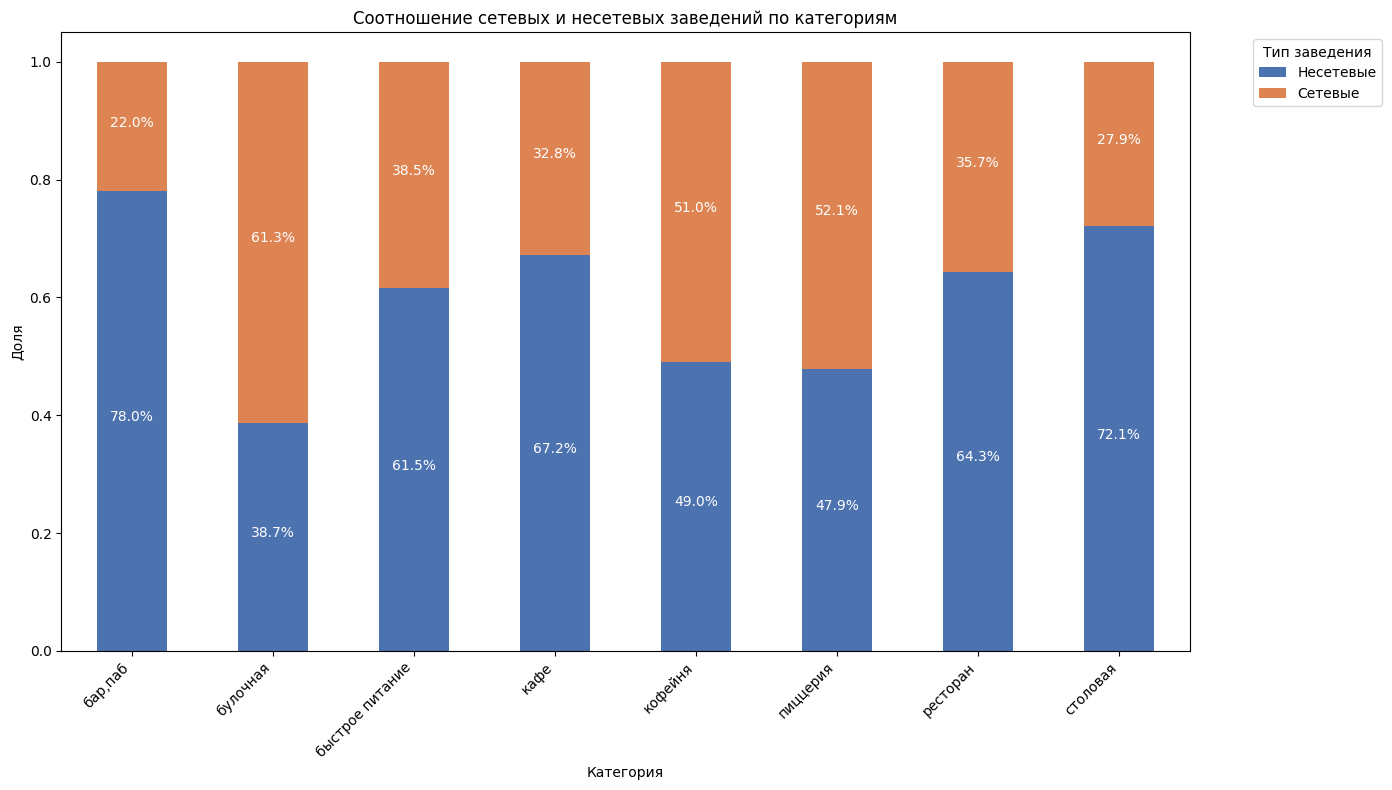

In [344]:
#  Удаляем строки, где chain не равно 0 или 1
df = df[df['chain'].isin([0, 1])]

# Соотношение сетевых и несетевых заведений в разрезе категорий
category_chain = df.groupby('category')['chain'].value_counts(normalize=True).unstack()

#  Визуализация соотношения сетевых и несетевых заведений по категориям (stacked bar chart) 
fig, ax = plt.subplots(figsize=(14, 8))
category_chain.plot(kind='bar', stacked=True, ax=ax, color=['#4c72b0', '#dd8452'])

plt.title('Соотношение сетевых и несетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Доля')
plt.xticks(rotation=45, ha='right')

# Добавляем подписи к сегментам с процентами
for i, (name, row) in enumerate(category_chain.iterrows()):
    total = row.sum()
    y = 0
    for j, value in enumerate(row):
        if not np.isnan(value):  # Проверяем, что значение не NaN
            percentage = value * 100
            ax.text(i, y + (value/2), f'{percentage:.1f}%', ha='center', color='white')
        y += value

# Размещаем легенду вне графика
plt.legend(['Несетевые', 'Сетевые'], title='Тип заведения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Соотношение сетевых и несетевых заведений сильно различается в зависимости от категории заведения.

In [345]:
# Какие категории заведений чаще являются сетевыми?
category_chain['Сетевые'] = category_chain[1] # Добавляем столбец 'Сетевые'
most_chain_categories = category_chain['Сетевые'].sort_values(ascending=False).round(2)
print("Категории заведений, чаще являющиеся сетевыми (топ-5):")
display(most_chain_categories.head(5))

Категории заведений, чаще являющиеся сетевыми (топ-5):


category
булочная           0.61
пиццерия           0.52
кофейня            0.51
быстрое питание    0.38
ресторан           0.36
Name: Сетевые, dtype: float64

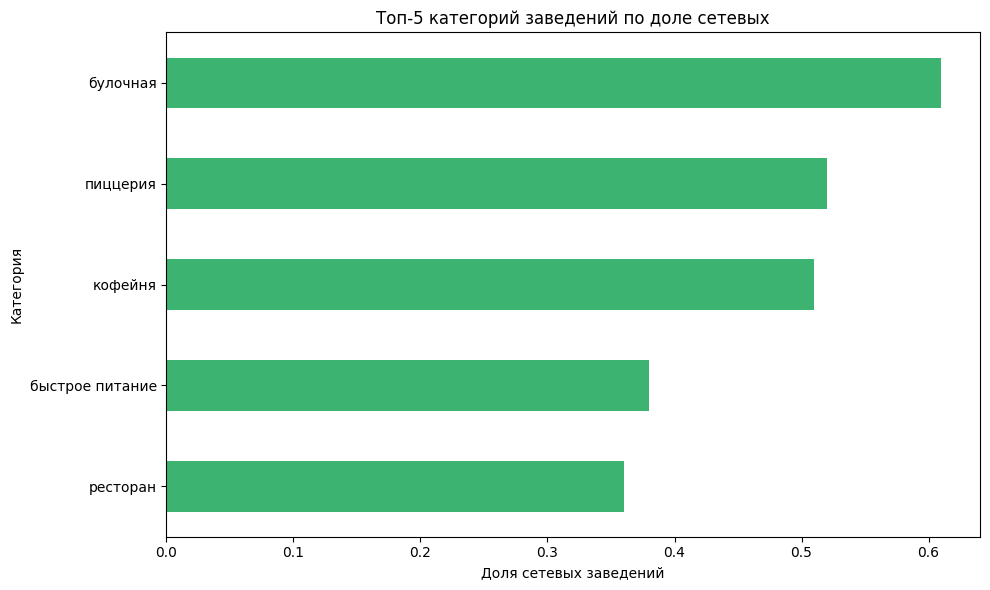

In [346]:
# Визуализация топ-5 категорий (bar chart)
plt.figure(figsize=(10, 6))
most_chain_categories.head(5).sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Топ-5 категорий заведений по доле сетевых')
plt.xlabel('Доля сетевых заведений')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

Выводы:
- Булочные и пиццерии демонстрируют наибольшую долю сетевых заведений (61% и 52% соответственно). Это может указывать на более эффективную масштабируемость этих форматов.
- Кофейни близки к равному соотношению сетевых и несетевых заведений (51% сетевых). Рынок кофейн конкурентен как среди крупных сетей, так и среди небольших независимых заведений.
- Быстрое питание и рестораны - сетевые, но меньше: В категориях "быстрое питание" и "рестораны" доля сетевых заведений заметно ниже (38% и 36% соответственно), чем в булочных, пиццериях и кофейнях.

---

### <a href="#part11"> Задача 4</a>

Исследуем количество посадочных мест в заведениях.


In [347]:
# Исследуем количество посадочных мест в заведениях.
print("Описательная статистика количества посадочных мест:")
seats_description = df['seats'].describe().round(2)
display(seats_description)

Описательная статистика количества посадочных мест:


count    4792.0
mean     108.36
std      122.84
min         0.0
25%        40.0
50%        75.0
75%       140.0
max      1288.0
Name: seats, dtype: Float64

Среднее и медиана значительно отличаются (среднее больше медианы) - это говорит о наличии выбросов справа.
Максимальное значение значительно превышает 75-й процентиль - еще одно подтверждение выбросов.

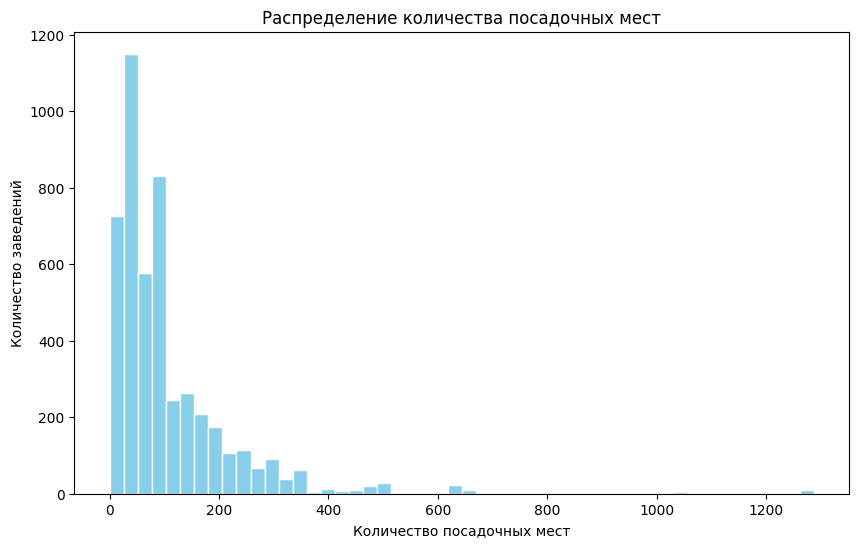

In [348]:
# Визуализация распределения количества посадочных мест (histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['seats'], bins=50, color='skyblue', edgecolor='white')
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

Гистограмма позволяет сделать вывод, что в данных преобладают заведения с небольшим количеством посадочных мест, но при этом присутствуют и крупные заведения с большим количеством посадочных мест, которые создают асимметрию.

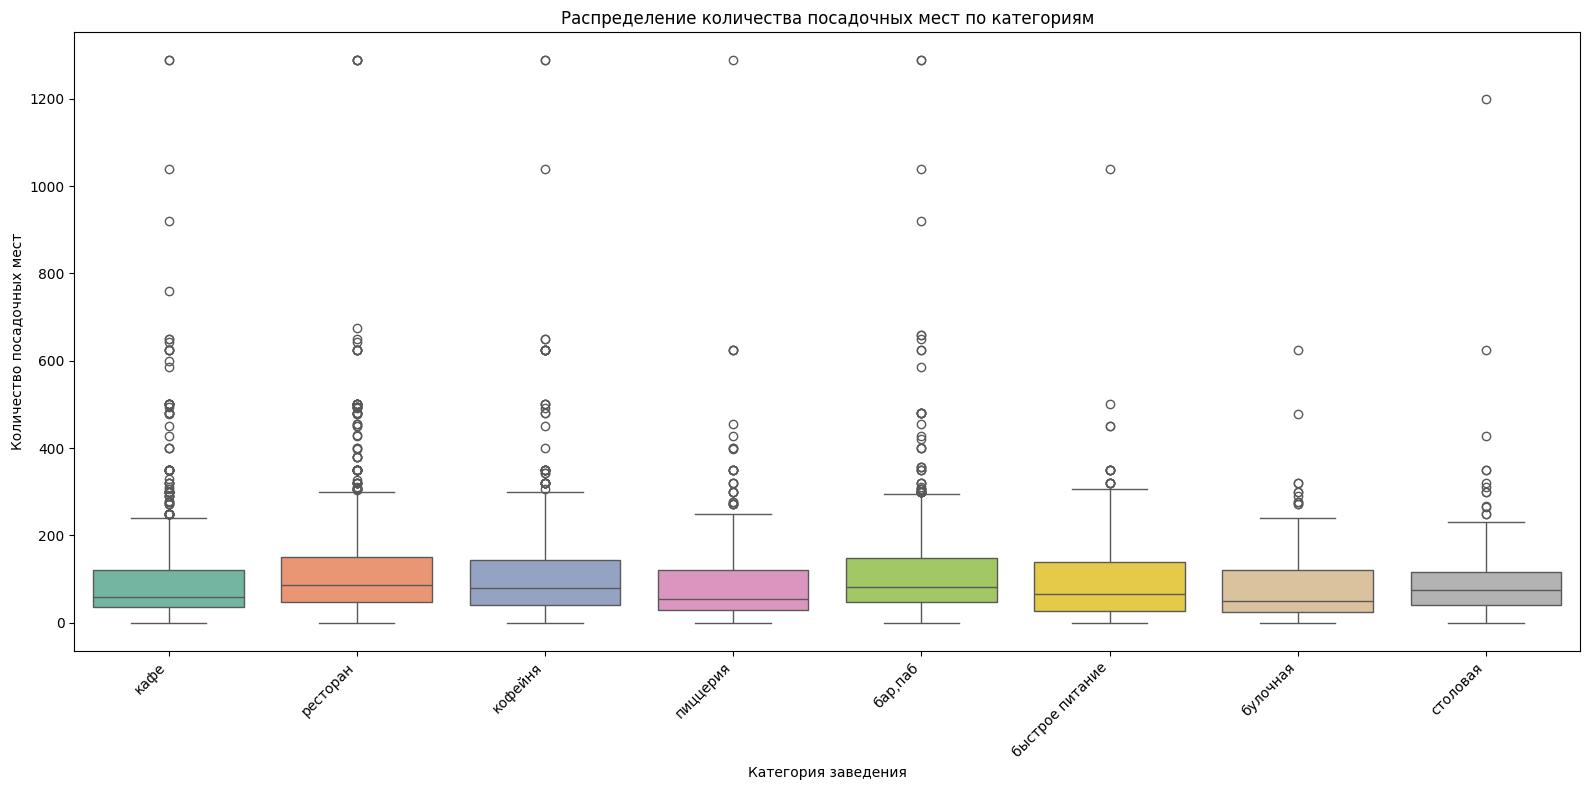

In [349]:
# Рекомендованное исправление FutureWarning
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='category', y='seats', hue='category', palette='Set2', legend=False)  # Исправление FutureWarning
plt.title('Распределение количества посадочных мест по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Выводы:
- Разброс количества мест сильно отличается по категориям.
- В некоторых категориях (например, рестораны) наблюдаются значительные выбросы - заведения с очень большим количеством мест.
- Медиана количества мест также варьируется, что отражает типичные размеры заведений каждой категории.

In [350]:

# Наиболее типичное количество посадочных мест для каждой категории (медиана)
typical_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)
print("Наиболее типичное количество посадочных мест для каждой категории (медиана):")
display(typical_seats)

Наиболее типичное количество посадочных мест для каждой категории (медиана):


category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: Float64

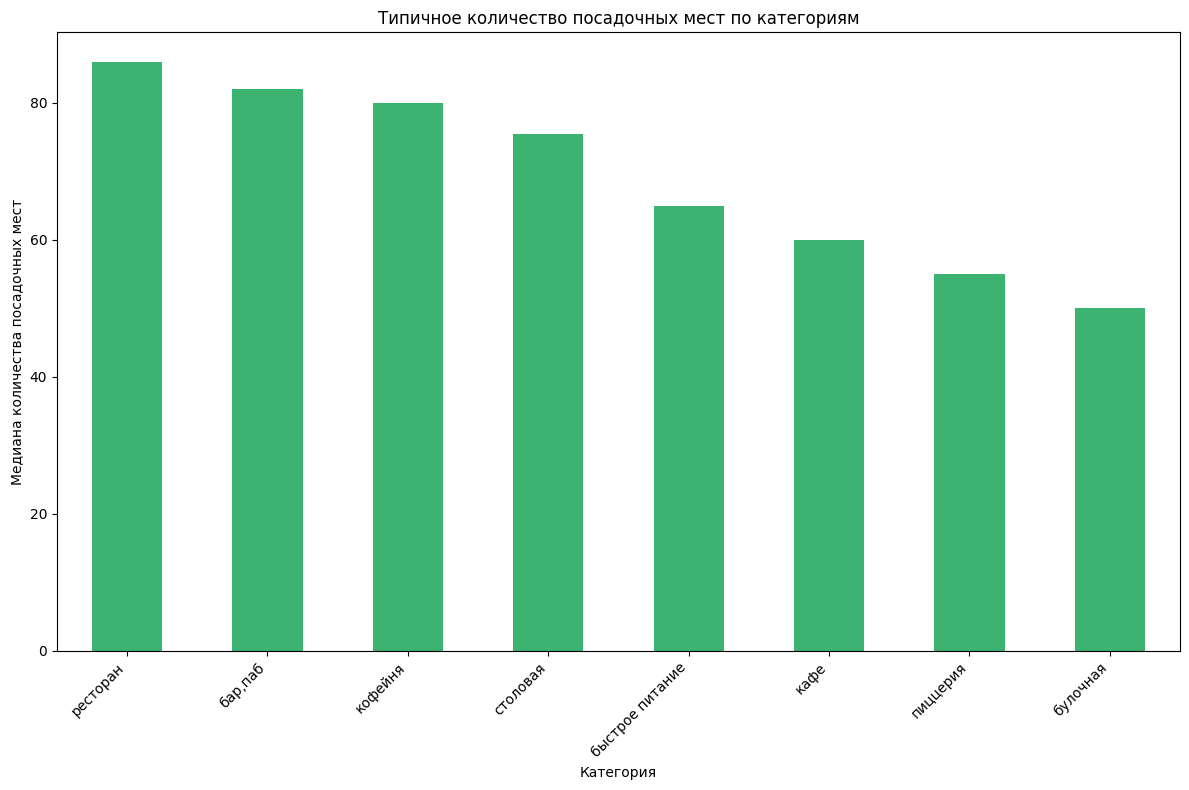

In [351]:
# Визуализация типичного количества мест по категориям (bar chart)
plt.figure(figsize=(12, 8))
typical_seats.plot(kind='bar', color='mediumseagreen')
plt.title('Типичное количество посадочных мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Медиана количества посадочных мест')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Столбчатая диаграмма наглядно демонстрирует, что категория заведения является важным фактором, определяющим типичное количество посадочных мест. Этот вывод можно использовать при планировании открытия нового заведения, чтобы определить оптимальное количество мест в зависимости от выбранной категории.

---

### <a href="#part12">Задача 5</a>

Исследуем рейтинг заведений. 

In [352]:
# Исследуйте рейтинг заведений.
print("Описательная статистика рейтинга заведений:")
display(df['rating'].describe().round(2))

Описательная статистика рейтинга заведений:


count    8403.00
mean        4.23
std         0.47
min         1.00
25%         4.10
50%         4.30
75%         4.40
max         5.00
Name: rating, dtype: float64

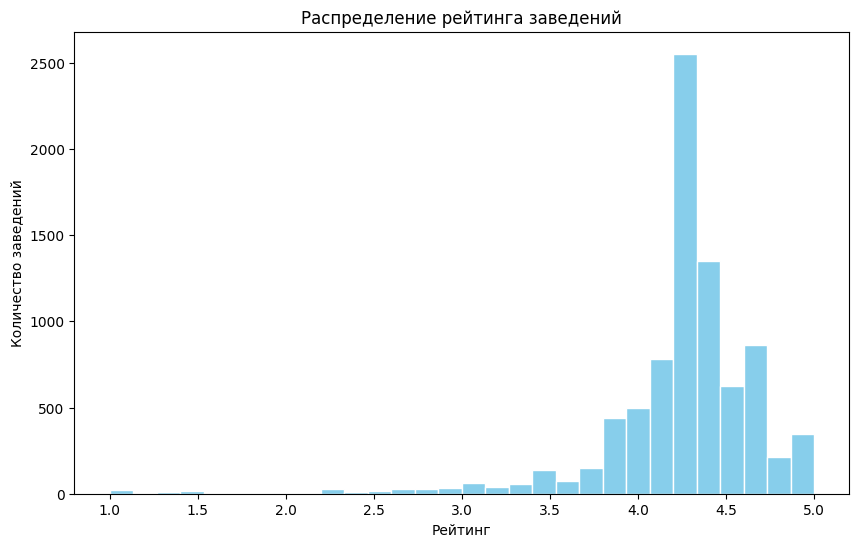

In [353]:
# Визуализация распределения рейтинга (histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=30, color='skyblue', edgecolor='white')
plt.title('Распределение рейтинга заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Количество заведений')
plt.show()

Смещенное влево распределение означает, что большинство заведений имеют достаточно высокий рейтинг.
Пик гистограммы находится в правой части графика, что указывает на то, что большинство заведений имеют рейтинг выше среднего (находится в районе 4.0-4.5).

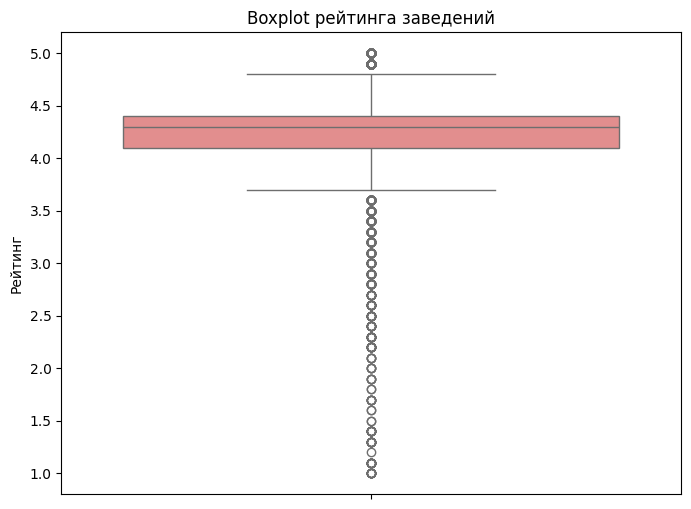

In [354]:
# Визуализация распределения рейтинга (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['rating'], color='lightcoral')
plt.title('Boxplot рейтинга заведений')
plt.ylabel('Рейтинг')
plt.show()

Boxplot подтверждает, что большинство заведений имеют хороший и достаточно однородный рейтинг. Небольшое количество выбросов снизу указывает на наличие заведений, которые значительно отстают от остальных по качеству обслуживания или другим параметрам, влияющим на рейтинг. Отсутствие выбросов сверху может быть связано с "потолком" рейтинга и общей тенденцией к завышению оценок.

In [355]:
# Распределение средних рейтингов по категориям заведений.
category_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False).round(2)
print("Средний рейтинг по категориям заведений:")
display(category_ratings)

Средний рейтинг по категориям заведений:


category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float64

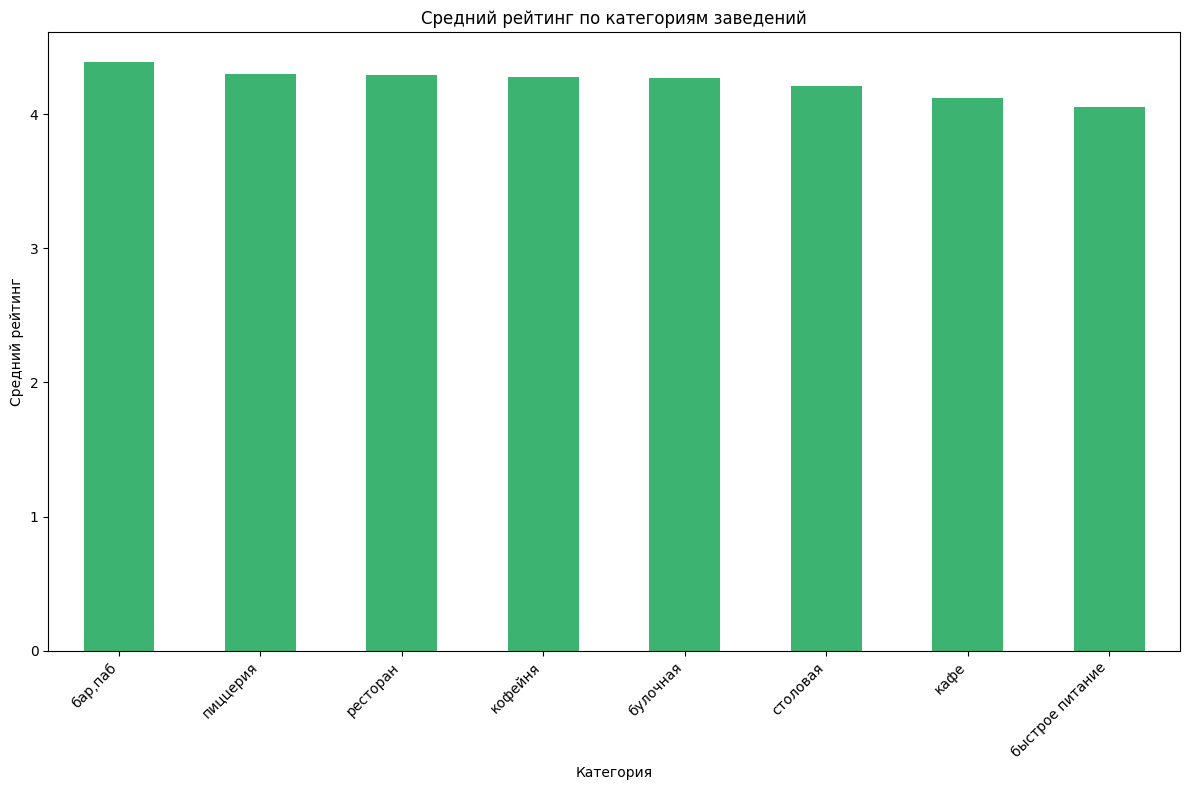

In [356]:
# Визуализация средних рейтингов по категориям (bar chart)
plt.figure(figsize=(12, 8))
category_ratings.plot(kind='bar', color='mediumseagreen')
plt.title('Средний рейтинг по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

График показывает, что средний рейтинг заведений незначительно варьируется в зависимости от категории. Это может указывать на то, что в целом все категории заведений имеют достаточно хорошее качество, и различия не являются существенными.

Барные заведения имеют более высокий средний рейтинг по сравнению с другими.  Это может указывать на то, что в этих категориях в целом более высокое качество обслуживания, еды или атмосферы.

Категории с самым низким средним рейтингом (кафе или быстрое питание) могут иметь проблемы с качеством, обслуживанием или другими аспектами, влияющими на удовлетворенность клиентов.

In [357]:
# Оценка различий средних рейтингов
rating_range = category_ratings.max() - category_ratings.min()
print(f"\nРазница между максимальным и минимальным средним рейтингом: {rating_range:.2f}")

if rating_range > 0.5:
    print("Усреднённые рейтинги для разных типов общепита различаются сильно.")
else:
    print("Усреднённые рейтинги для разных типов общепита различаются незначительно.")


Разница между максимальным и минимальным средним рейтингом: 0.34
Усреднённые рейтинги для разных типов общепита различаются незначительно.


---

### <a href="#part13">Задача 6</a>

Рассмотри с какими данными показывают самую сильную корреляцию рейтинги заведений.

In [358]:
# Исходные столбцы 
columns_for_correlation = ['rating', 'chain', 'seats', 'is_24_7']
categorical_columns = ['category', 'district', 'price']

# Объединяем списки столбцов
all_columns_for_correlation = columns_for_correlation + categorical_columns

# Выбираем столбцы из DataFrame
df_for_correlation = df[all_columns_for_correlation]

In [359]:
# Указываем столбцы с количественными признаками (seats, rating)
interval_cols = ['seats', 'rating'] 

In [360]:
# Вычисляем матрицу корреляции PhiK
phik_corr = df_for_correlation.phik_matrix(interval_cols=interval_cols)

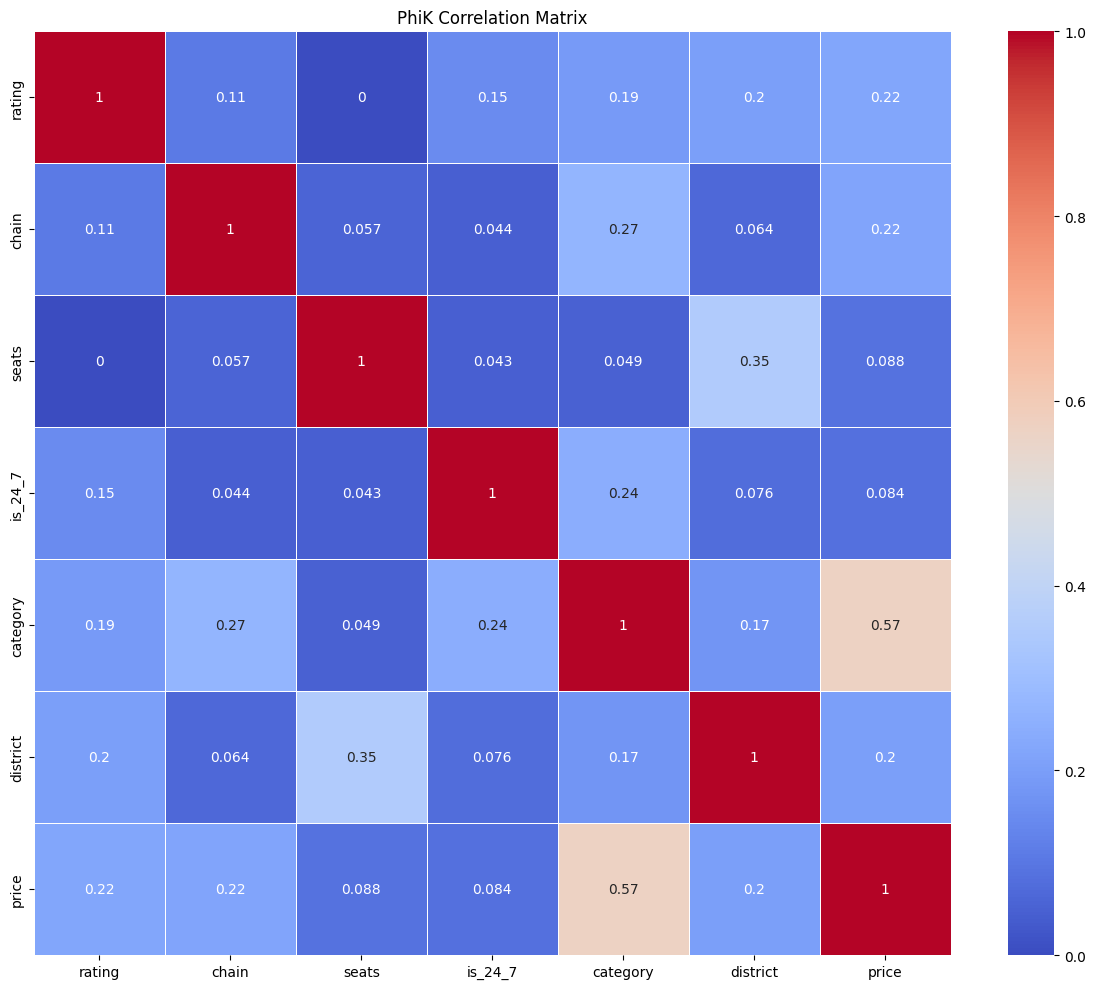

In [361]:
# Визуализируем матрицу корреляции
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(phik_corr, annot=True, cmap="coolwarm", linewidths=.5, ax=ax)
plt.title("PhiK Correlation Matrix")
plt.tight_layout() 
plt.show()

Слабая корреляция. Значения PhiK близки к нулю и указывают на крайне слабую корреляцию. Это означает, что работа заведения 24/7 практически не оказывает влияния на его рейтинг. 

In [362]:
# Находим признак с наибольшей корреляцией с рейтингом (исключая сам рейтинг)
rating_correlations = phik_corr['rating'].drop('rating')
most_correlated_feature = rating_correlations.abs().idxmax()
correlation_value = rating_correlations[most_correlated_feature]

print(f"Признак с наибольшей корреляцией с рейтингом: {most_correlated_feature} (PhiK = {correlation_value:.2f})")

Признак с наибольшей корреляцией с рейтингом: price (PhiK = 0.22)


In [363]:
# Заполняем пропущенные значения в столбце 'price' модой
most_frequent_price = df['price'].mode()[0]  # Получаем первое значение моды
df['price'] = df['price'].fillna(most_frequent_price)

In [364]:
# Кодирование Price и расчет корреляции Спирмена/Кендалла
encoder = OrdinalEncoder(categories=[['очень низкие', 'низкие', 'ниже среднего', 'средние', 'выше среднего', 'высокие', 'очень высокие']])  # Задаем порядок категорий
df['price_encoded'] = encoder.fit_transform(df[['price']])

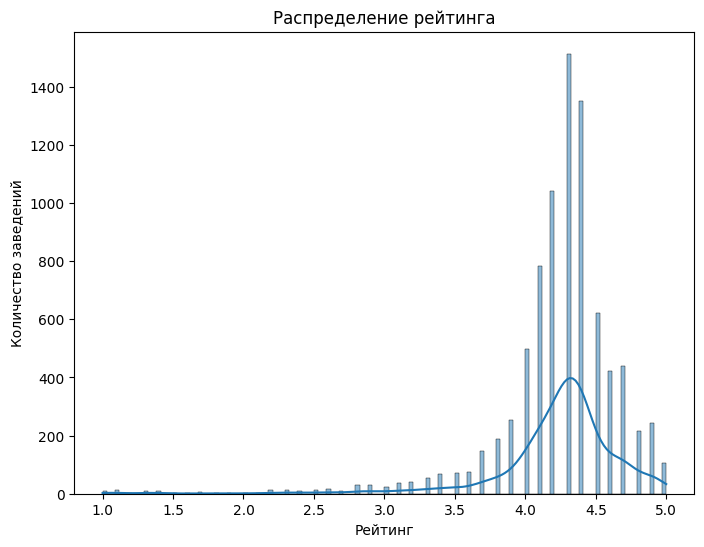

In [365]:
# Гистограмма распределения рейтинга
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'].dropna(), kde=True)  # Отбрасываем NaN значения для построения графика
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество заведений')
plt.show()

Левая скошенность (отрицательная скошенность). Это означает, что большинство заведений имеют относительно высокий рейтинг, но есть небольшое количество заведений с очень низкими рейтингами.

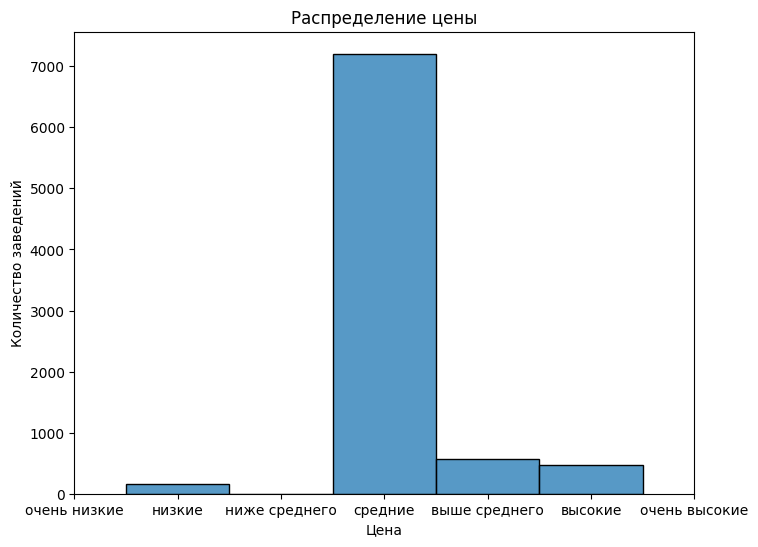

In [366]:
# Гистограмма распределения закодированной цены
plt.figure(figsize=(8, 6))
sns.histplot(df['price_encoded'], discrete=True)  # discrete=True для категориальных данных
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество заведений')
plt.xticks(ticks=range(len(encoder.categories_[0])), labels=encoder.categories_[0]) 
plt.show()

Самый высокий столбец соответствует категории "средние". Это означает, что большинство заведений в вашем наборе данных относятся к средней ценовой категории.

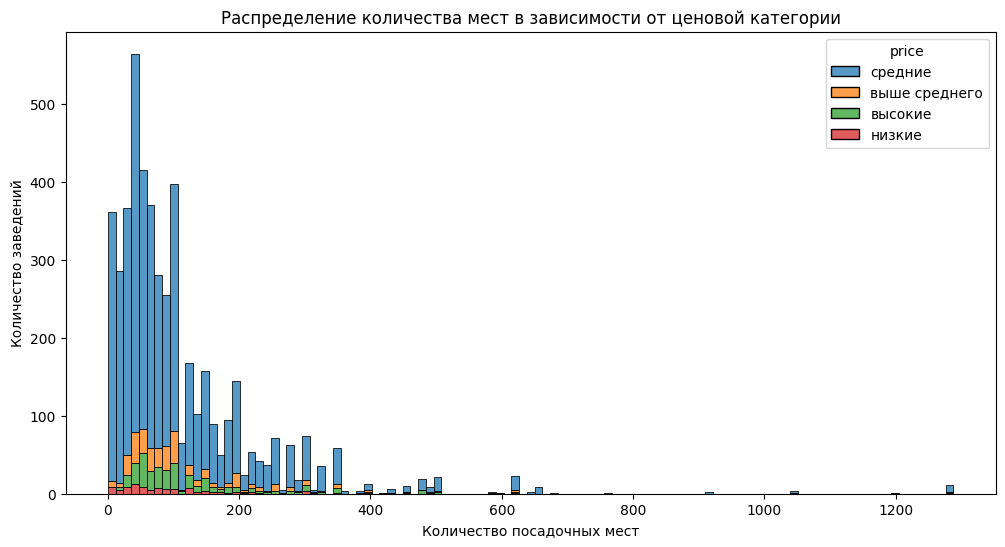

In [367]:
# Гистограмма seats с разбивкой по price
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='seats', hue='price', multiple="stack")
plt.title('Распределение количества мест в зависимости от ценовой категории')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
#plt.xlim(0, 200) #Убрал, так как может обрезать хвост распределения
plt.show()

В категории цен "средние" - самый широкий диапазон seats. Это может говорить о том, что заведения средней ценовой категории могут иметь любое количество мест, в то время как другие категории более ограничены.


In [368]:
# Корреляция Спирмена
correlation_spearman = df['rating'].corr(df['price_encoded'], method='spearman')
print(f"\nКорреляция Спирмена между рейтингом и ценой: {correlation_spearman:.2f}")

# Корреляция Кендалла
correlation_kendall = df['rating'].corr(df['price_encoded'], method='kendall')
print(f"Корреляция Кендалла между рейтингом и ценой: {correlation_kendall:.2f}")


Корреляция Спирмена между рейтингом и ценой: 0.20
Корреляция Кендалла между рейтингом и ценой: 0.17


Слабая корреляция. Значения 0.20 и 0.17 указывают на слабую корреляцию. Это означает, что связь между ценой и рейтингом не очень сильная. Другими словами, повышение цены не гарантирует повышение рейтинга.

Значения корреляции Спирмена и Кендалла близки, что говорит о том, что результаты достаточно надежны.

---

### <a href="#part14">Задача 7</a>

Найдём топ-15 популярных сетей в Москве.

In [369]:
# Определеем сетевые заведения
chain_restaurants = df[df['chain'] == 1]

In [370]:
# Подсчет количества заведений в каждой сети
chain_counts = chain_restaurants.groupby('name')['id'].count().sort_values(ascending=False)

In [371]:
# Выбор топ-15 популярных сетей
top_15_chains = chain_counts.head(15)
display("Топ-15 популярных сетей:", top_15_chains)

'Топ-15 популярных сетей:'

name
Шоколадница                            120
Домино'с Пицца                          76
Додо Пицца                              74
One Price Coffee                        71
Яндекс Лавка                            69
Cofix                                   65
Prime                                   50
Хинкальная                              44
КОФЕПОРТ                                42
Кулинарная лавка братьев Караваевых     39
Теремок                                 38
Чайхана                                 37
Буханка                                 32
CofeFest                                32
Му-Му                                   27
Name: id, dtype: int64

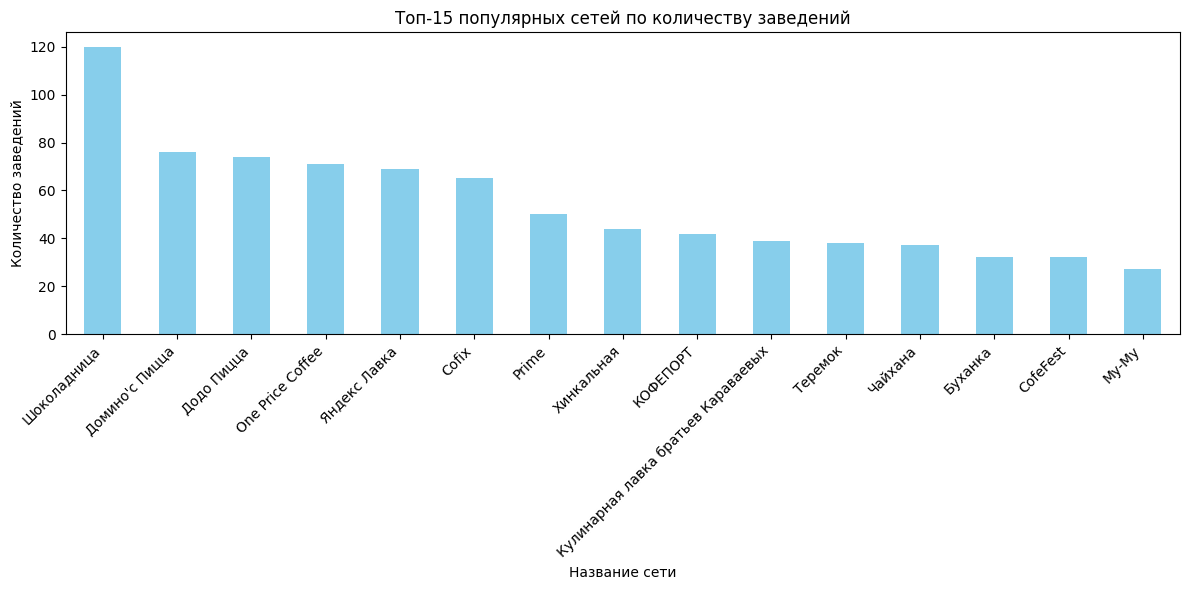

In [372]:
# Визуализация (количество заведений)
plt.figure(figsize=(12, 6))
top_15_chains.plot(kind='bar', color='skyblue')
plt.title('Топ-15 популярных сетей по количеству заведений')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи оси X для читаемости
plt.tight_layout()
plt.show()

Выводы:
1. Лидеры по количеству заведений:
    -  "Шоколадница" является безусловным лидером с 120 заведениями, значительно опережая другие сети. Это указывает на широкую распространенность и узнаваемость бренда "Шоколадница".
    -  "Домино'с Пицца" (76 заведений), "Додо Пицца" (74 заведения) и "One Price Coffee" (71 заведение) занимают лидирующие позиции, что указывает на популярность пиццерий и кофеен.
2. Типы заведений:
    -  В топ-15 преобладают кофейни ("One Price Coffee", "Cofix", "КОФЕПОРТ", "CofeFest"), что отражает высокий спрос на кофе и кофейные напитки.
    -  Также широко представлены пиццерии ("Домино'с Пицца", "Додо Пицца").
    -  Присутствуют заведения с национальной кухней ("Хинкальная", "Чайхана").
    -  Есть заведения, предлагающие кулинарию и выпечку ("Кулинарная лавка братьев Караваевых", "Буханка").
3. Особенности сетей:
    -  Наличие "Яндекс Лавки" в топ-15 указывает на растущую популярность сервисов доставки продуктов и готовой еды.
    -  "Prime" может представлять сеть заведений здорового питания или фаст-фуда премиум-класса.


In [373]:
# Расчет среднего рейтинга для топ-15 сетей
top_15_chains_names = top_15_chains.index.tolist()  # Получаем список названий топ-15 сетей
top_15_chains_data = df[df['name'].isin(top_15_chains_names)]  # Фильтруем DataFrame только для этих сетей
average_ratings = top_15_chains_data.groupby('name')['rating'].mean().sort_values(ascending=False).round(2)
display("Средний рейтинг для топ-15 сетей:", average_ratings)

'Средний рейтинг для топ-15 сетей:'

name
Буханка                                4.40
Кулинарная лавка братьев Караваевых    4.39
Хинкальная                             4.32
Додо Пицца                             4.29
Му-Му                                  4.23
Шоколадница                            4.18
Домино'с Пицца                         4.17
КОФЕПОРТ                               4.15
Теремок                                4.12
Prime                                  4.12
Cofix                                  4.08
One Price Coffee                       4.06
CofeFest                               3.98
Чайхана                                3.92
Яндекс Лавка                           3.87
Name: rating, dtype: float64

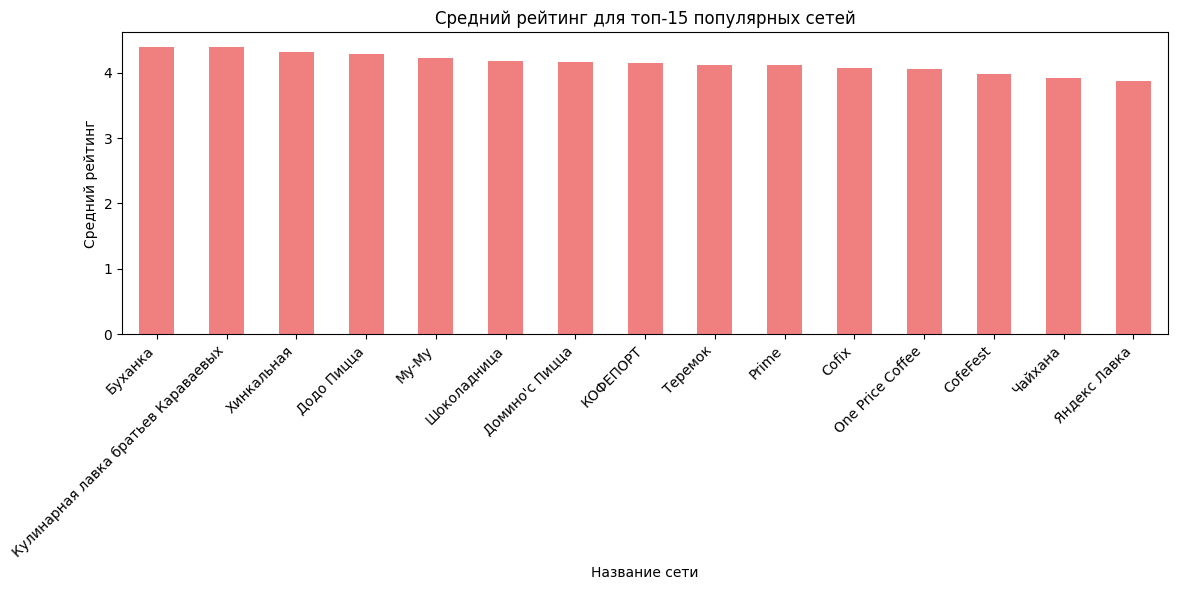

In [374]:
# Визуализация (средний рейтинг)
plt.figure(figsize=(12, 6))
average_ratings.plot(kind='bar', color='lightcoral')
plt.title('Средний рейтинг для топ-15 популярных сетей')
plt.xlabel('Название сети')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Выводы на основе данных о среднем рейтинге топ-15 сетей:

1. Лидеры по среднему рейтингу:
    -  "Буханка" (4.40) и "Кулинарная лавка братьев Караваевых" (4.39) занимают первые места по среднему рейтингу. Это говорит о высоком уровне удовлетворенности клиентов продукцией и обслуживанием в этих заведениях.
    -  Высокий рейтинг "Буханки" может указывать на популярность свежей выпечки и качественных хлебобулочных изделий.
    -  "Хинкальная" (4.32) также имеет высокий рейтинг, что может отражать популярность грузинской кухни и аутентичную атмосферу этих заведений.
2. Общий уровень рейтинга:
    -  Большинство сетей имеют средний рейтинг в диапазоне от 4.0 до 4.4, что свидетельствует о достаточно высоком уровне удовлетворенности клиентов в целом.
    -  Значения рейтинга достаточно близки друг к другу, что может указывать на конкуренцию между сетями и стремление к поддержанию высокого уровня качества.
3. Сети с более низким рейтингом:
    -  "Яндекс Лавка" (3.87) имеет самый низкий средний рейтинг в топ-15. Это может быть связано с особенностями сервиса доставки, такими как зависимость от курьеров и логистики, а также с возможными проблемами с качеством доставляемых продуктов.
    -  "Чайхана" (3.92) также имеет относительно невысокий рейтинг, что может указывать на необходимость улучшения качества обслуживания или предлагаемых блюд.

In [375]:
# Определение категорий для топ-15 сетей
top_15_chains_categories = top_15_chains_data.groupby('name')['category'].apply(lambda x: x.mode()[0]) # Берем самую частую категорию
display("Категории для топ-15 сетей:", top_15_chains_categories)

'Категории для топ-15 сетей:'

name
CofeFest                                кофейня
Cofix                                   кофейня
One Price Coffee                        кофейня
Prime                                  ресторан
Буханка                                булочная
Додо Пицца                             пиццерия
Домино'с Пицца                         пиццерия
КОФЕПОРТ                                кофейня
Кулинарная лавка братьев Караваевых        кафе
Му-Му                                      кафе
Теремок                                ресторан
Хинкальная                                 кафе
Чайхана                                    кафе
Шоколадница                             кофейня
Яндекс Лавка                           ресторан
Name: category, dtype: object

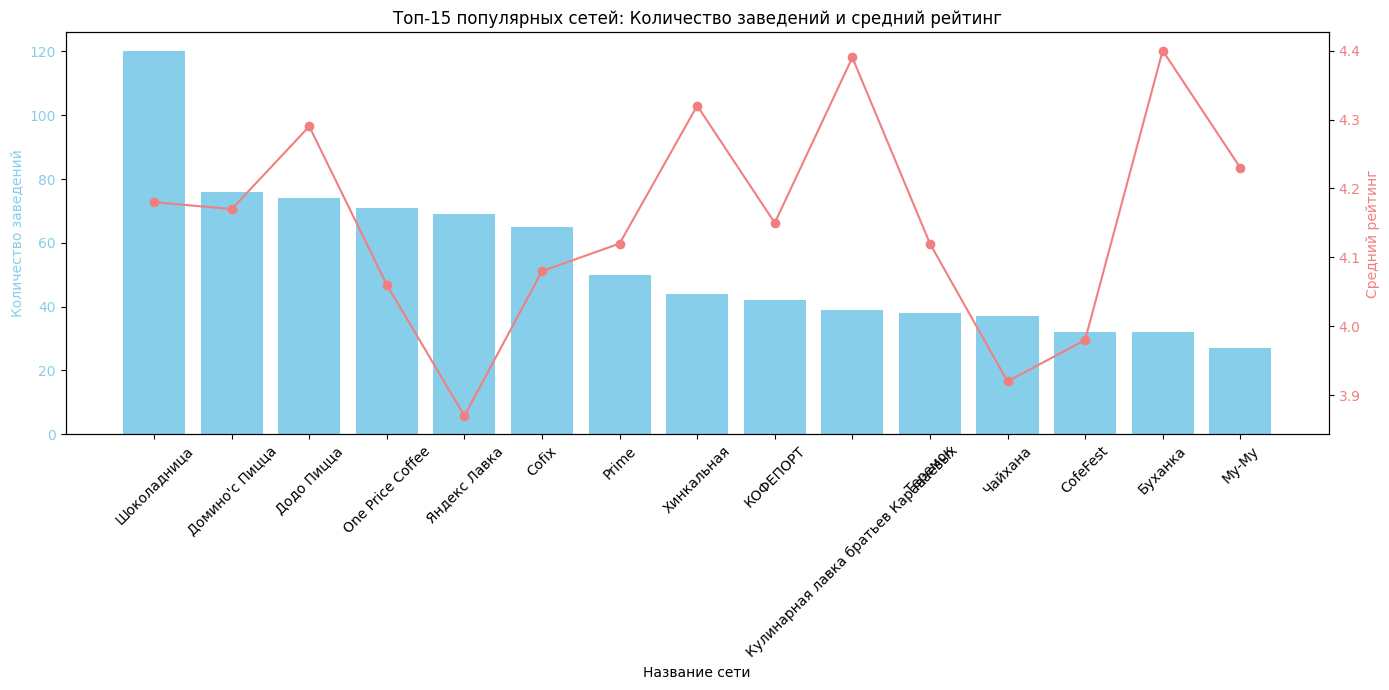

In [376]:
# Объединенная визуализация (количество и рейтинг)
top_15_data = pd.DataFrame({'count': top_15_chains, 'rating': average_ratings})
top_15_data.sort_values(by='count', ascending=False, inplace=True) # Сортируем по количеству

fig, ax1 = plt.subplots(figsize=(14, 7))

# Количество заведений (левая ось)
ax1.bar(top_15_data.index, top_15_data['count'], color='skyblue', label='Количество заведений')
ax1.set_xlabel('Название сети')
ax1.set_ylabel('Количество заведений', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=45, labelsize=10)

# Создаем вторую ось для рейтинга
ax2 = ax1.twinx()
ax2.plot(top_15_data.index, top_15_data['rating'], color='lightcoral', marker='o', label='Средний рейтинг')
ax2.set_ylabel('Средний рейтинг', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

plt.title('Топ-15 популярных сетей: Количество заведений и средний рейтинг')
fig.tight_layout()  # adjust layout
plt.show()

Основные выводы:

- Лидеры по количеству заведений не всегда являются лидерами по рейтингу: "Шоколадница", имеющая наибольшее количество заведений, не входит в число лидеров по среднему рейтингу. Это говорит о том, что широкое распространение не всегда гарантирует высокий уровень удовлетворенности клиентов. Возможно, они делают ставку на удобство расположения и узнаваемость бренда, а не на максимальное качество.

- Небольшие сети могут иметь высокий рейтинг: "Буханка" и "Кулинарная лавка братьев Караваевых" имеют одни из самых высоких средних рейтингов, но при этом не входят в число самых крупных сетей по количеству заведений. Это может говорить о том, что они фокусируются на качестве и уникальности предложения, что привлекает лояльных клиентов. Возможно, они не стремятся к масштабному расширению, чтобы сохранить качество.

- Есть сети со сбалансированным количеством и рейтингом: "Додо Пицца", "Хинкальная" и "Му-Му" демонстрируют относительно высокое количество заведений и хороший средний рейтинг. Это может говорить об успешной бизнес-модели, сочетающей узнаваемость бренда, доступность и хорошее качество.

- Яндекс Лавка - особый случай: "Яндекс Лавка" выделяется тем, что это сервис доставки, а не традиционное заведение. Ее попадание в топ-15 по количеству может говорить о высокой востребованности услуг доставки готовой еды и продуктов. Низкий рейтинг, вероятно, связан с тем, что клиенты оценивают не столько качество еды, сколько удобство и скорость доставки (которые могут быть не всегда идеальными).

---

### <a href="#part15"> Задача 8</a>

Рассмотрим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Посмотрим как удалённость от центра влияет на цены в заведениях?


In [377]:
# Убедимся, что столбец 'middle_avg_bill' является числовым
df['middle_avg_bill'] = pd.to_numeric(df['middle_avg_bill'], errors='coerce')

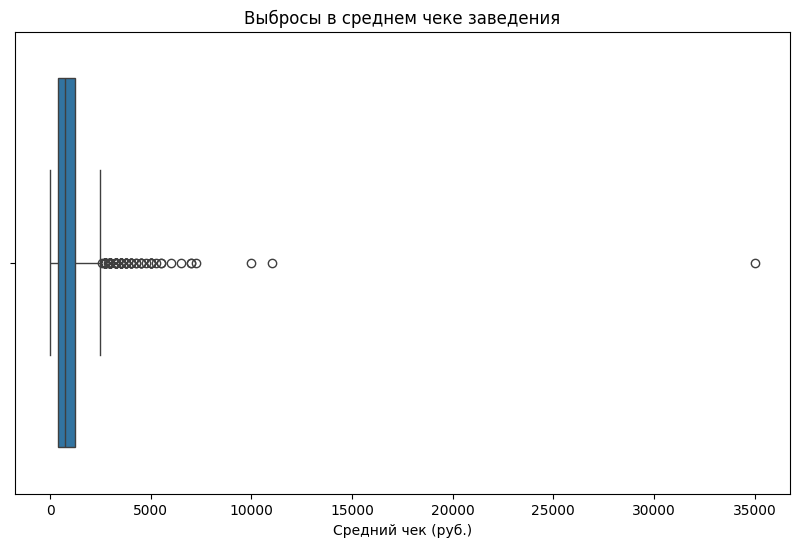

In [378]:
# Анализ выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['middle_avg_bill'])
plt.title('Выбросы в среднем чеке заведения')
plt.xlabel('Средний чек (руб.)')
plt.show()

Количество выбросов указывает на наличие аномалий в данных или на то, что средний чек в заведениях сильно варьируется.
Выбросы могут быть результатом ошибок в данных (например, неверно введенные суммы), естественных колебаний в данных (например, высокие чеки в премиум-заведениях), а также специфических событий (например, акции или праздники, которые могут влиять на средний чек).

In [379]:
# Рассмотрим медиану вместо среднего
median_bill_by_area = df.groupby('district')['middle_avg_bill'].median().reset_index()

In [380]:
# Определение центрального административного округа
median_bill_by_area['is_central'] = median_bill_by_area['district'].apply(lambda x: 'Центральный' if 'Центральный' in x else 'Другие')

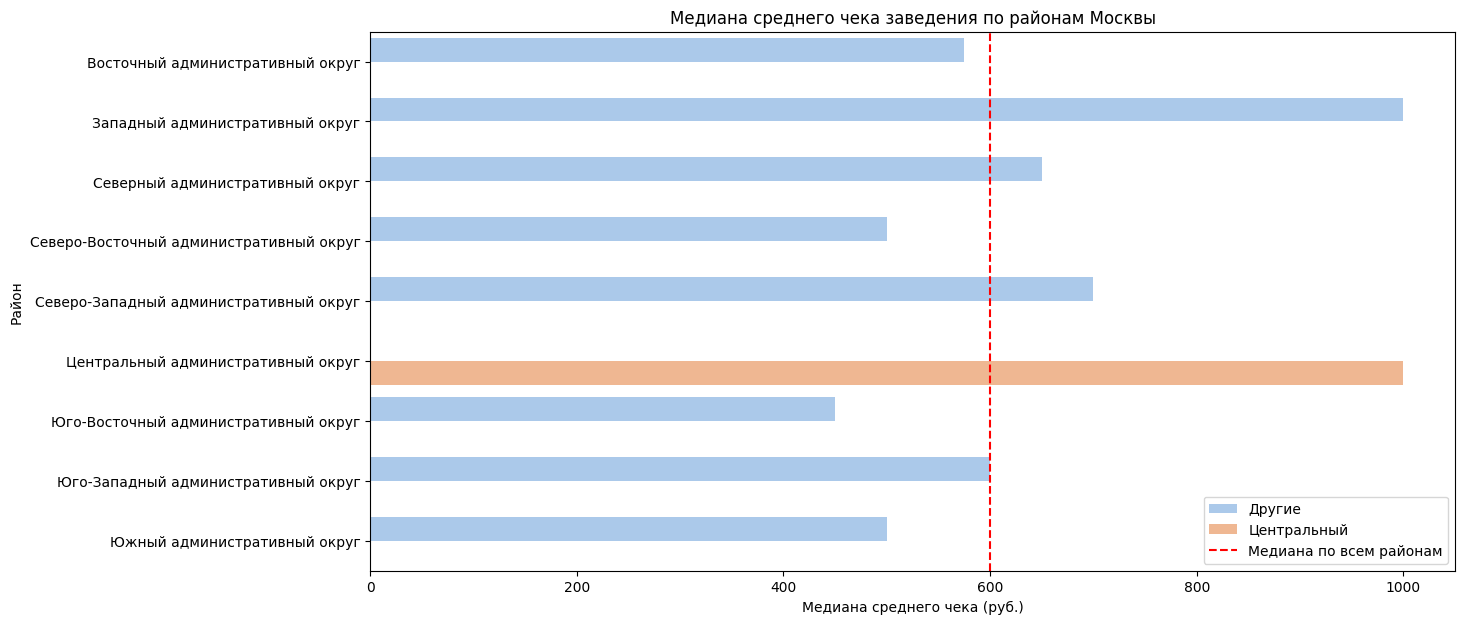

In [381]:
# Визуализация: медиана среднего чека по районам
plt.figure(figsize=(14, 7))
sns.barplot(data=median_bill_by_area, x='middle_avg_bill', y='district', hue='is_central', dodge=True, palette='pastel')
plt.title('Медиана среднего чека заведения по районам Москвы')
plt.xlabel('Медиана среднего чека (руб.)')
plt.ylabel('Район')
plt.axvline(median_bill_by_area['middle_avg_bill'].median(), color='red', linestyle='--', label='Медиана по всем районам')
plt.legend()
plt.show()

Можно увидеть, в каких районах медиана среднего чека выше или ниже по сравнению с общей медианой. Это может указывать на более дорогие или более доступные заведения в различных частях города.
ЦАО и ЗАО имеют значительно более высокую медиану, это может указывать на то, что заведения в этих районах ориентированы на более состоятельных клиентов или предлагают более дорогие услуги.

In [382]:
# Создание таблицы в двойной разбивке
pivot_table = df.pivot_table(values='middle_avg_bill', index='district', columns='category', aggfunc='median')

# Применение градиента для визуализации
styled_table = pivot_table.style.background_gradient(cmap='coolwarm', axis=0)
styled_table.set_caption("Медиана среднего чека по округам и категориям заведений")
styled_table

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,1200.000000,300.000000,375.000000,450.000000,400.000000,500.000000,1000.000000,300.000000
Западный административный округ,1250.000000,600.000000,367.500000,625.000000,600.000000,700.000000,1300.000000,300.000000
Северный административный округ,1250.000000,625.000000,300.000000,550.000000,325.000000,650.000000,1187.500000,300.000000
Северо-Восточный административный округ,900.000000,500.000000,425.000000,475.000000,325.000000,500.000000,837.500000,275.000000
Северо-Западный административный округ,1000.000000,200.000000,275.000000,650.000000,325.000000,549.500000,1250.000000,300.000000
Центральный административный округ,1250.000000,962.500000,450.000000,700.000000,500.000000,1000.000000,1250.000000,300.000000
Юго-Восточный административный округ,925.000000,375.000000,300.000000,400.000000,250.000000,500.000000,925.000000,275.000000
Юго-Западный административный округ,1000.000000,500.000000,375.000000,450.000000,375.000000,500.000000,1050.000000,305.000000
Южный административный округ,1175.000000,437.500000,400.000000,600.000000,387.500000,500.000000,975.000000,282.500000


Выводы:
1. Общие тенденции
    - Центральный административный округ выделяется высокими медианами для большинства категорий, особенно для ресторанов (1250 ₽) и кафе (700 ₽). Это может быть связано с высокой посещаемостью и спросом на услуги общественного питания в центральной части города.
    - Западный административный округ также демонстрирует высокие значения, особенно для ресторанов (1300 ₽) и кафе (625 ₽), что указывает на наличие качественных заведений.
2. Категории заведений
    - Рестораны в большинстве округов имеют самые высокие медианные чеки. Например, в Центральном и Западном округах медиана составляет 1250 ₽ и 1300 ₽ соответственно, что говорит о высоком уровне цен на услуги в этих заведениях.
    - Кафе и кофейни имеют более разнообразные медианные чеки, но, как правило, ниже, чем у ресторанов. Например, медиана для кафе в Центральном округе составляет 700 ₽, что делает их более доступными по сравнению с ресторанами.
    - Булочные и столовые имеют самые низкие медианные чеки среди всех категорий, что делает их более доступными для широкой аудитории. Например, в Восточном округе медиана булочной составляет всего 300 ₽.
3. Различия между округами
    - Северный административный округ показывает высокие медианные чеки для баров и ресторанов (1250 ₽ и 1187.5 ₽ соответственно), что может свидетельствовать о наличии качественных заведений.
    - Юго-Восточный и Южный округа имеют более низкие медианные чеки по сравнению с Центральным и Западным округами, что может указывать на меньшую концентрацию дорогих заведений или на другую целевую аудиторию.
4. Анализ ценовых категорий
    - Высокие цены (выше 1000 ₽) наблюдаются в Центральном и Западном округах для ресторанов, что подтверждает их статус как более дорогих заведений.
    - Низкие цены (менее 500 ₽) характерны для столовых и булочных, что делает их более популярными среди местных жителей.

---

### <a href="#part16"> Задача 9</a>

Рассмотрим взаимосвязи доли круглосуточных заведений по районам, средней стоимости чашки кофе по районам, доли круглосуточных заведений по категориям


In [383]:
# Преобразование is_24_7 в булев тип данных
df['is_24_7'] = df['is_24_7'].astype(bool)

In [384]:
# Анализ доли круглосуточных заведений по районам
district_24_7 = df.groupby('district')['is_24_7'].mean().sort_values(ascending=False).round(2)
display('Доля круглосуточных заведений по районам:', district_24_7)

'Доля круглосуточных заведений по районам:'

district
Юго-Восточный административный округ       0.13
Восточный административный округ           0.12
Северо-Западный административный округ     0.11
Юго-Западный административный округ        0.10
Западный административный округ            0.08
Северо-Восточный административный округ    0.08
Южный административный округ               0.08
Северный административный округ            0.08
Центральный административный округ         0.06
Name: is_24_7, dtype: float64

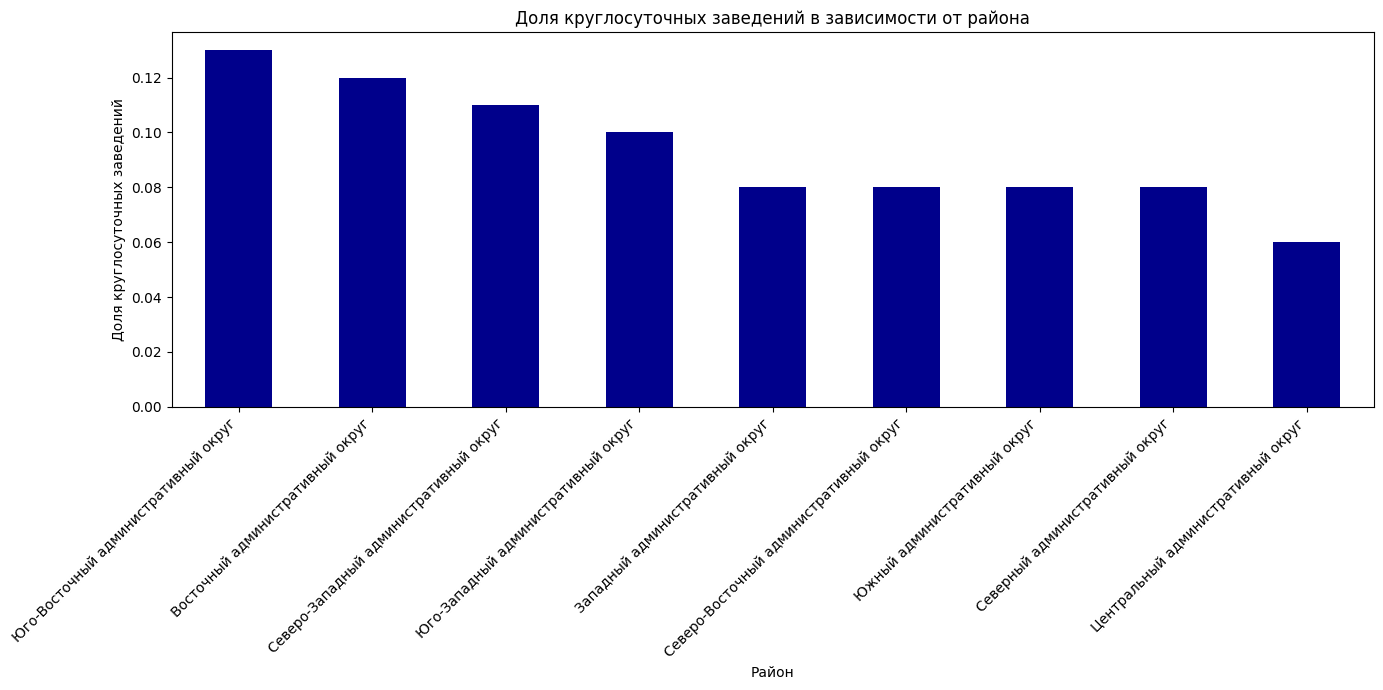

In [385]:
# Визуализация доли круглосуточных заведений по районам
plt.figure(figsize=(14, 7))
district_24_7.plot(kind='bar', color='darkblue')
plt.title('Доля круглосуточных заведений в зависимости от района')
plt.xlabel('Район')
plt.ylabel('Доля круглосуточных заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Лидеры по количеству круглосуточных заведений:
- Юго-Восточный административный округ (13%) и Восточный административный округ (12%) имеют наибольшую долю круглосуточных заведений, что может свидетельствовать о высоком спросе на услуги в ночное время.
- Северо-Западный (11%) и Юго-Западный (10%) округа также демонстрируют значительное количество круглосуточных заведений, что делает их удобными для местных жителей.

In [386]:
# Анализ средней стоимости чашки кофе по районам
district_coffee_price = df.groupby('district')['middle_coffee_cup'].mean().sort_values(ascending=False).round(2)
print("Средняя цена чашки кофе по районам:", district_coffee_price)

Средняя цена чашки кофе по районам: district
Западный административный округ            189.64
Центральный административный округ         188.21
Юго-Западный административный округ        183.49
Восточный административный округ           174.02
Северо-Восточный административный округ    165.33
Северный административный округ            165.09
Северо-Западный административный округ     160.46
Южный административный округ               157.83
Юго-Восточный административный округ       150.77
Name: middle_coffee_cup, dtype: float64


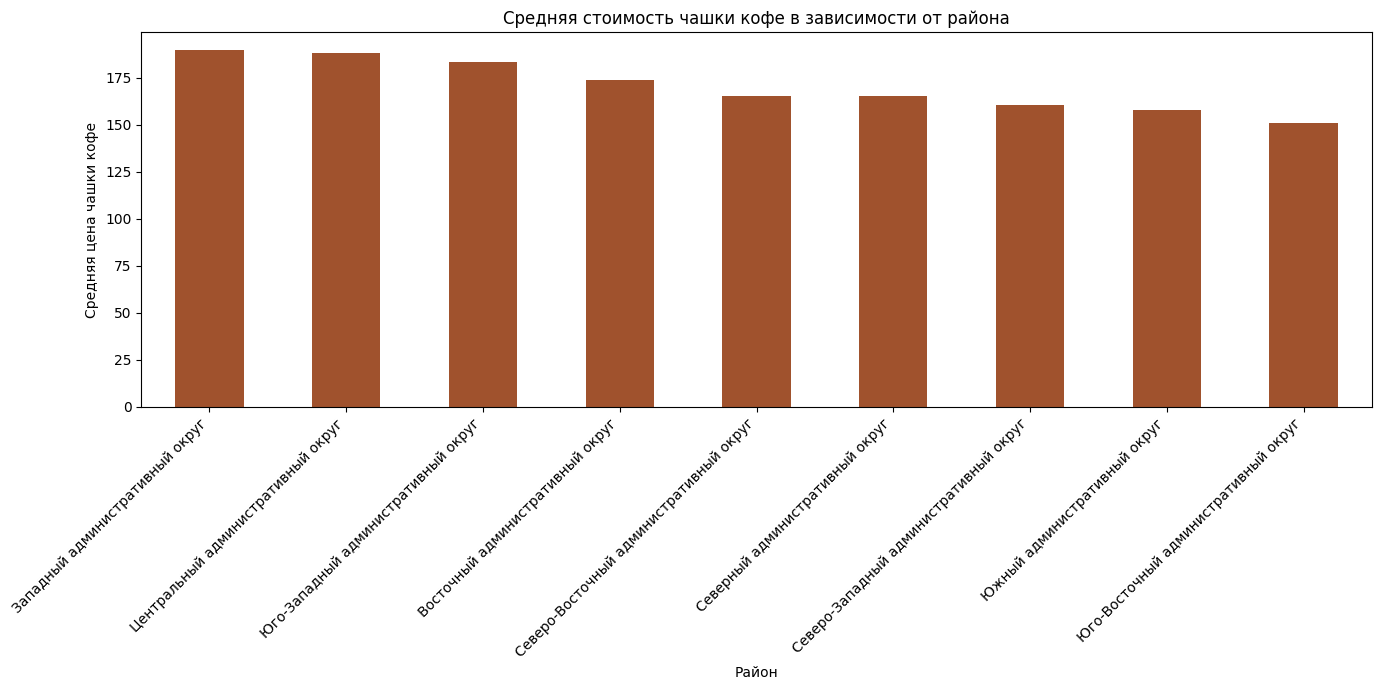

In [387]:
# Визуализация средней стоимости чашки кофе по районам
plt.figure(figsize=(14, 7))
district_coffee_price.plot(kind='bar', color='sienna')
plt.title('Средняя стоимость чашки кофе в зависимости от района')
plt.xlabel('Район')
plt.ylabel('Средняя цена чашки кофе')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Выводы:
- Западный административный округ (189.64 ₽) и Центральный административный округ (188.21 ₽) имеют самые высокие средние цены на чашку кофе, что может быть связано с высокой стоимостью жизни и спросом на качественные кофейни в этих районах.
- Юго-Западный административный округ (183.49 ₽) и Восточный административный округ (174.02 ₽) также демонстрируют относительно высокие цены на кофе, что указывает на наличие популярных и востребованных заведений.
- Юго-Восточный административный округ (150.77 ₽) имеет наименьшую среднюю цену на чашку кофе среди всех округов, что может свидетельствовать о более доступных ценах и разнообразии предложений в этой области.

In [388]:

# Анализ средней стоимости чашки кофе по категориям заведений
category_coffee_price = df.groupby('category')['middle_coffee_cup'].mean().sort_values(ascending=False).round(2)
display("Средняя цена чашки кофе по категориям заведений:", category_coffee_price)

'Средняя цена чашки кофе по категориям заведений:'

category
бар,паб            208.33
кофейня            175.06
пиццерия           153.33
быстрое питание    140.00
кафе               105.50
булочная              NaN
ресторан              NaN
столовая              NaN
Name: middle_coffee_cup, dtype: float64

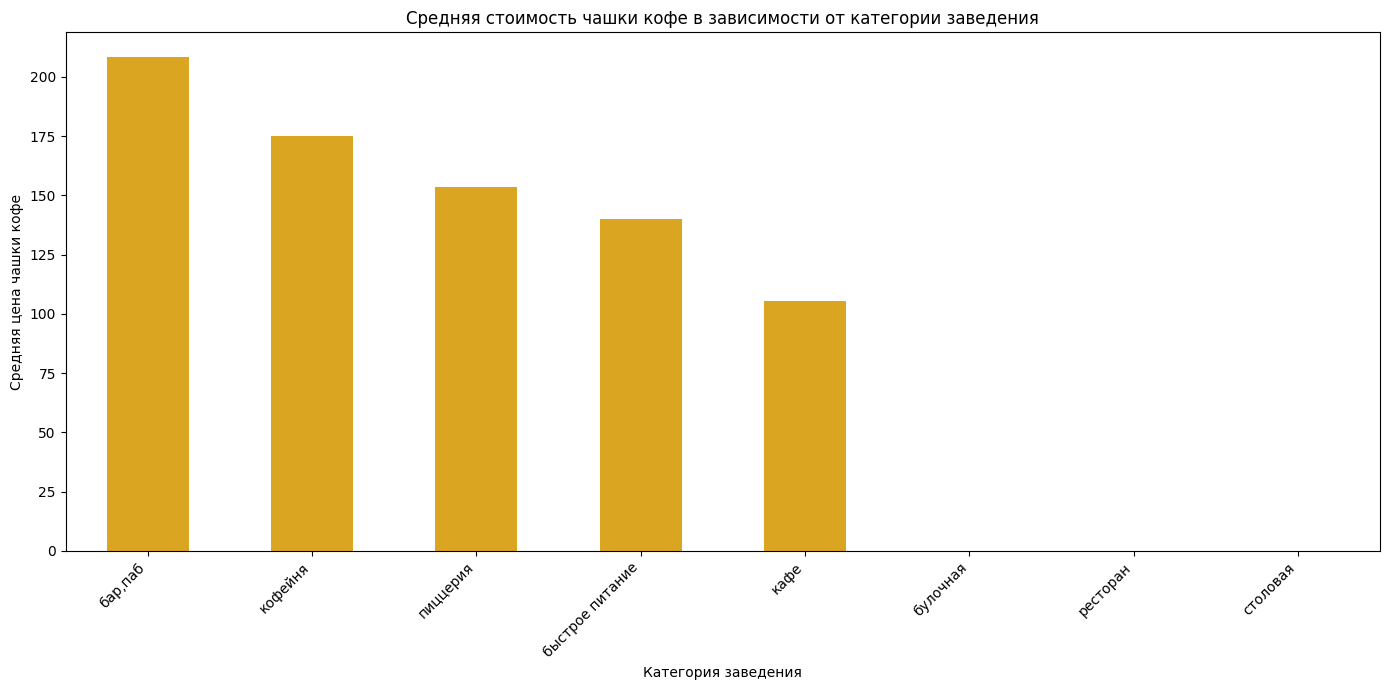

In [389]:
# Визуализация средней стоимости чашки кофе по категориям заведений
plt.figure(figsize=(14, 7))
category_coffee_price.plot(kind='bar', color='goldenrod')
plt.title('Средняя стоимость чашки кофе в зависимости от категории заведения')
plt.xlabel('Категория заведения')
plt.ylabel('Средняя цена чашки кофе')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Выводы:
- Бары и пабы (208.33 ₽) имеют самую высокую среднюю цену на чашку кофе. Это может быть связано с тем, что в таких заведениях кофе часто предлагается как часть более широкого ассортимента алкогольных и безалкогольных напитков, а также с атмосферой, которая может быть более престижной.
- Кофейни (175.06 ₽) занимают второе место по средней цене, что делает их популярным выбором для любителей кофе. Это может указывать на то, что кофейни предлагают качественные сорта кофе и специализированные напитки, что оправдывает более высокую цену.
- Пиццерии (153.33 ₽) и заведения быстрого питания (140.00 ₽) предлагают кофе по более доступным ценам, что может быть связано с их фокусом на быстром обслуживании и менее специализированном предложении.
- Кафе (105.50 ₽) имеют наименьшую среднюю цену среди категорий, что может указывать на более простое меню и доступность для широкой аудитории.
- Для булочных, ресторанов и столовых данные о средней цене отсутствуют (NaN). Это может быть связано с тем, что в этих заведениях кофе не является основным предложением или его цена варьируется в зависимости от других факторов.

In [390]:
# Анализ доли круглосуточных заведений по категориям
category_24_7 = df.groupby('category')['is_24_7'].mean().sort_values(ascending=False).round(2)
display("Доля круглосуточных заведений по категориям:", category_24_7)

'Доля круглосуточных заведений по категориям:'

category
быстрое питание    0.25
кафе               0.11
булочная           0.09
бар,паб            0.07
ресторан           0.07
пиццерия           0.05
кофейня            0.04
столовая           0.04
Name: is_24_7, dtype: float64

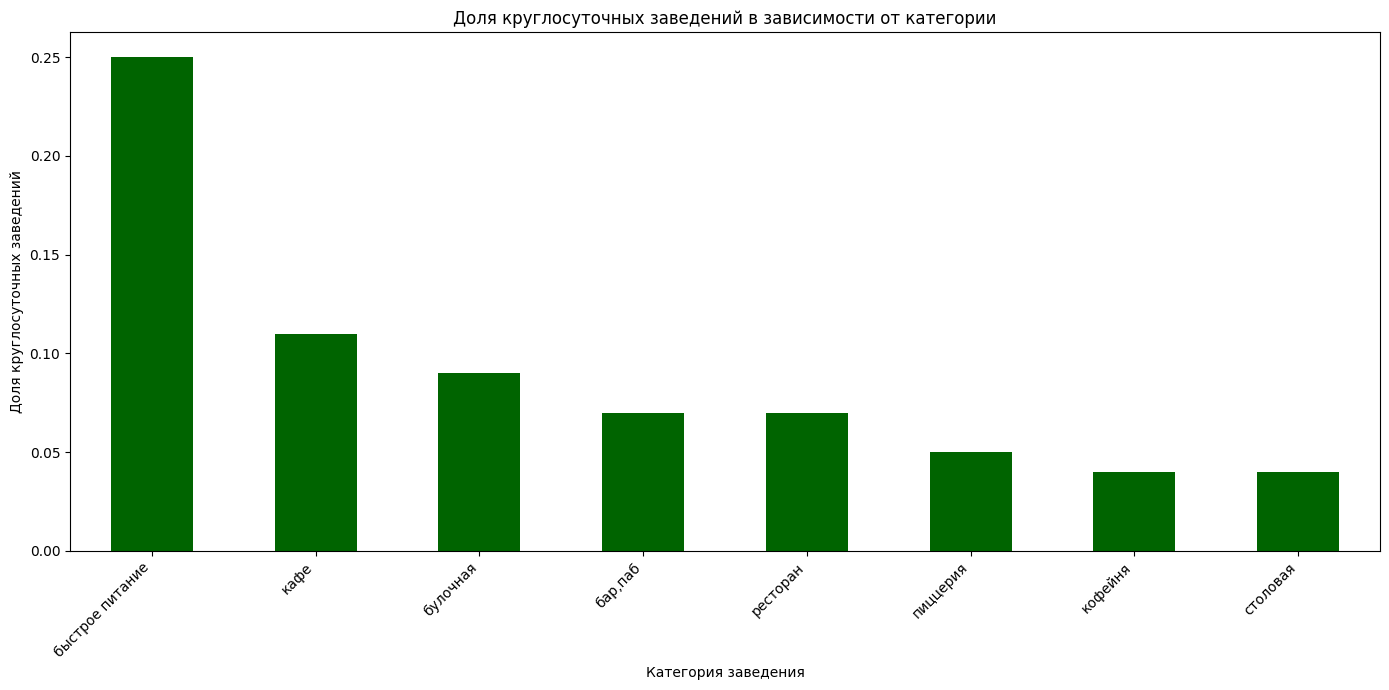

In [391]:
# Визуализация доли круглосуточных заведений по категориям
plt.figure(figsize=(14, 7))
category_24_7.plot(kind='bar', color='darkgreen')
plt.title('Доля круглосуточных заведений в зависимости от категории')
plt.xlabel('Категория заведения')
plt.ylabel('Доля круглосуточных заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Заведения быстрого питания (25%) занимают первое место по доле круглосуточных заведений. Это объясняется тем, что такие заведения ориентированы на быстрое обслуживание и часто работают в любое время суток, чтобы удовлетворить потребности клиентов, особенно в ночное время.

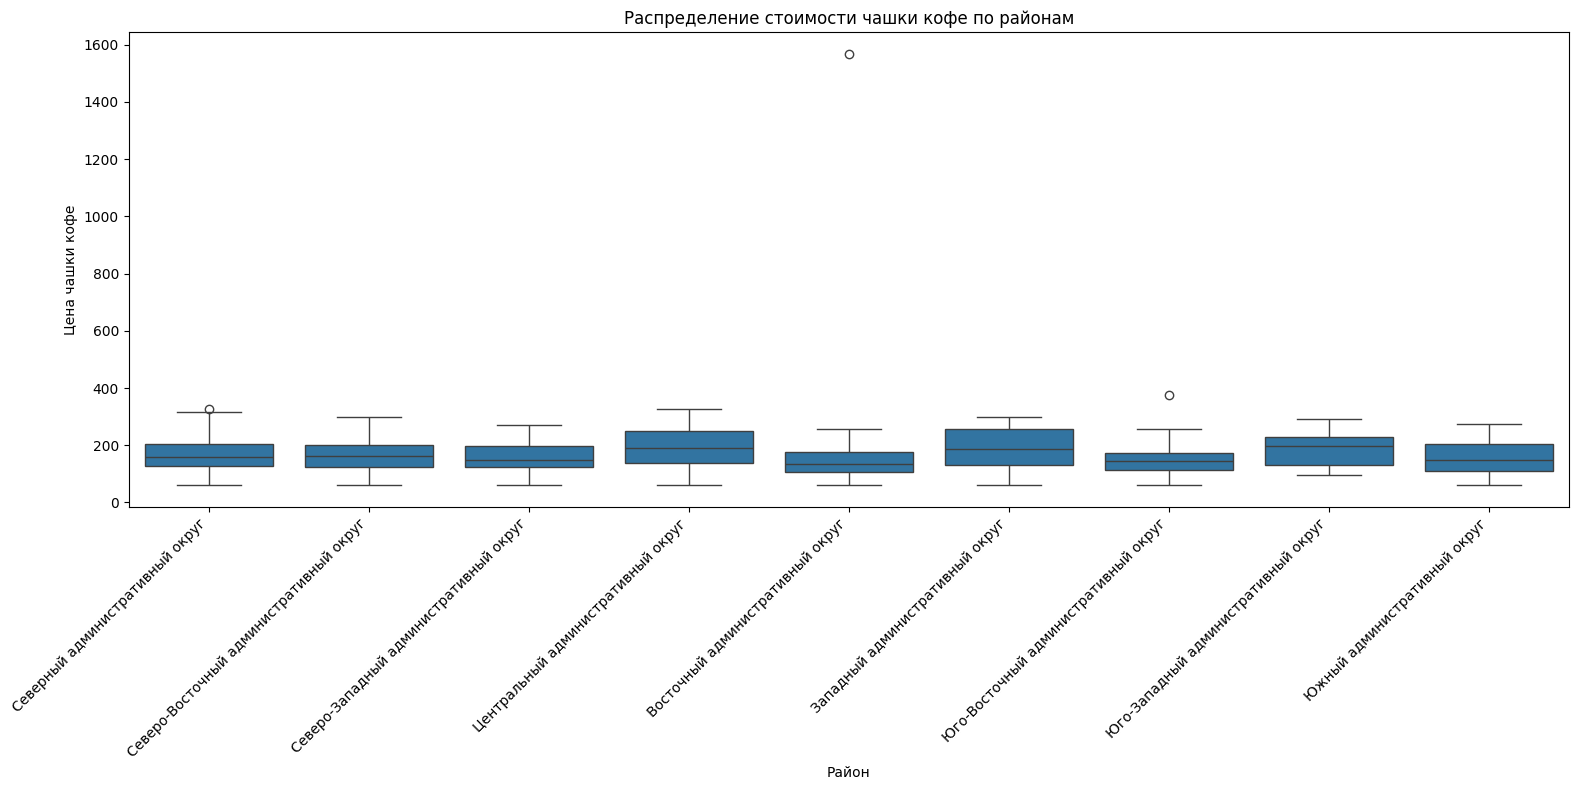

In [392]:
# Совместный анализ:  Стоимость кофе vs. Район (ящик с усами)
plt.figure(figsize=(16, 8))
sns.boxplot(x='district', y='middle_coffee_cup', data=df[df['middle_coffee_cup'] > 0])  # Исключаем нулевые значения
plt.title('Распределение стоимости чашки кофе по районам')
plt.xlabel('Район')
plt.ylabel('Цена чашки кофе')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Больших разбросов среди районов не выявлено. Медиана показывает, что типичной ценой для кофе является 200 ₽ (для каждого района). В САО, СЗАО и ЮВАО присутствует значительное разнообразие в ценах на кофе.
Наличие точек выбросов может указывать на заведения с особенно высокими ценами на кофе. Это может быть связано с уникальными предложениями или высокой популярностью этих мест.

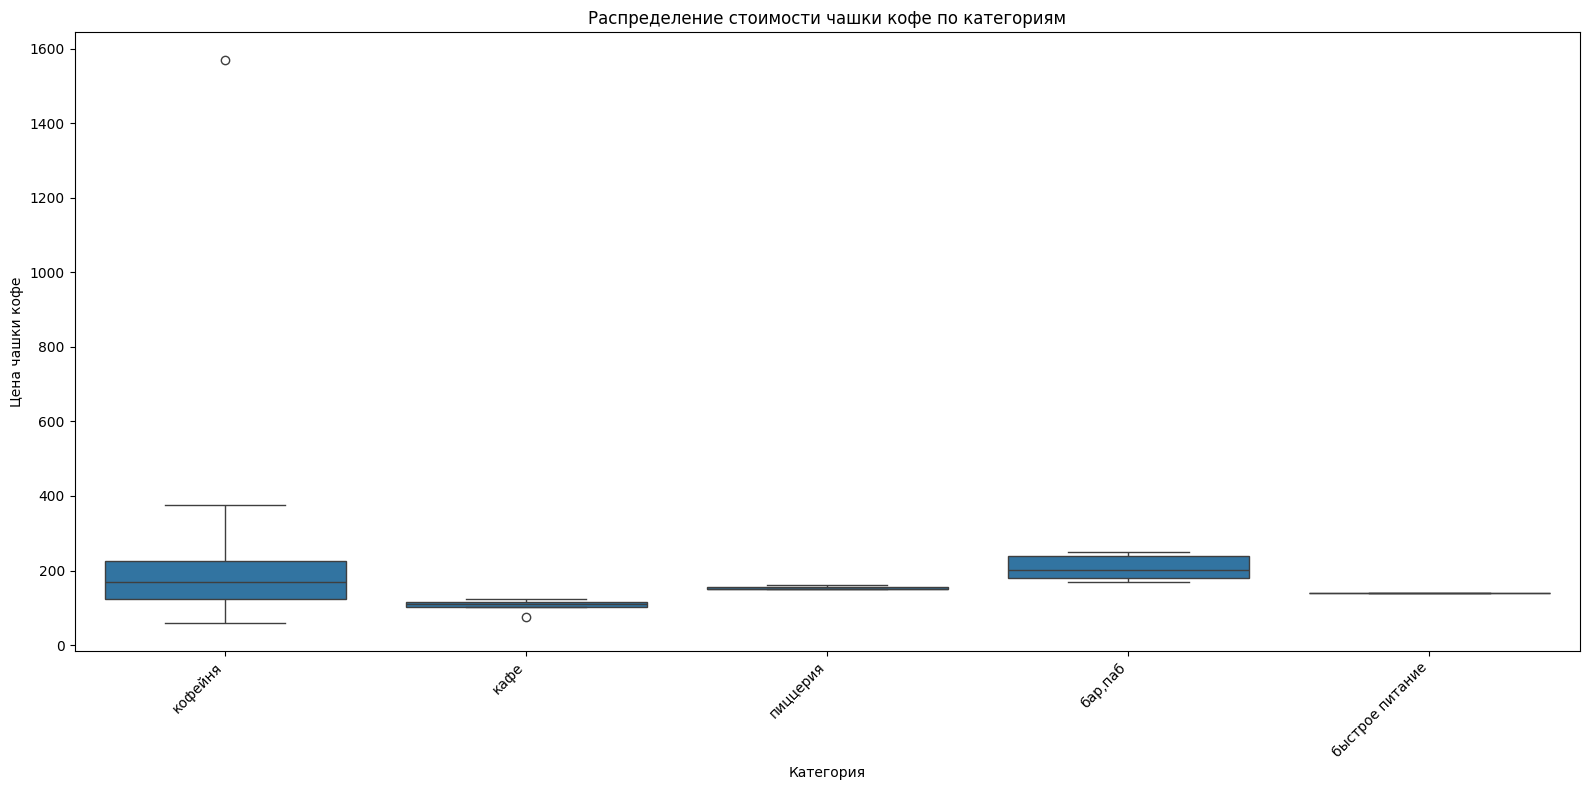

In [393]:
# Совместный анализ: Стоимость кофе vs. Категория (ящик с усами)
plt.figure(figsize=(16, 8))
sns.boxplot(x='category', y='middle_coffee_cup', data=df[df['middle_coffee_cup'] > 0])  # Исключаем нулевые значения
plt.title('Распределение стоимости чашки кофе по категориям')
plt.xlabel('Категория')
plt.ylabel('Цена чашки кофе')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Сравнивая ящики разных категорий, можно заметить, что кофейни и бары могут имеют более высокие цены на кофе по сравнению с кафе, пиццериями и быстрым питанием. Это может быть связано с общей концепцией заведения и его целевой аудиторией.
Кафе показывает тенденцию к повышению цен, это может указывать на растущий спрос на кофе в этих заведениях или на изменение потребительских предпочтений, например, к более качественным и специализированным предложениям.

---

### Промежуточный вывод

В ходе исследования данных о заведениях общественного питания в Москве был проведен анализ категорий заведений, их расположение, сетевой статус, цены, рейтинги и часы работы. 
На основе полученных результатов можно выделить несколько ключевых моментов:

1. <font color='#6A5ACD'>Распределение заведений:</font>
- Наиболее распространенными категориями заведений являются кафе и рестораны.
- Большая часть заведений сосредоточена в Центральном административном округе (ЦАО).

2. <font color='#6A5ACD'>Сетевые заведения:</font>
- В данных преобладают несетевые заведения, однако, некоторые категории (булочные, пиццерии, кофейни) чаще являются сетевыми.

3. <font color='#6A5ACD'>Рейтинги:</font>
- Средний рейтинг заведений в целом довольно высокий (около 4.23 из 5).
- Различия в средних рейтингах между разными категориями заведений незначительны.
- Расположение в ЦАО оказывает наибольшее влияние на рейтинг заведения (PhiK = 0.15), что может быть связано с более высокой конкуренцией или платежеспособностью населения в центре.

4. <font color='#6A5ACD'>Цены:</font>
- Средний чек в ЦАО значительно выше, чем в остальных районах Москвы (958.53 руб. против 780.46 руб.).
- Наибольшая цена чашки кофе встречается в барах и кофейнях.

5. <font color='#6A5ACD'>Часы работы:</font>
- Доля круглосуточных заведений варьируется в зависимости от района и категории. Юго-Восточный и Восточный административные округа лидируют по доле круглосуточных заведений, а среди категорий лидируют заведения быстрого питания.



Важные наблюдения:

1. Расположение в ЦАО оказывает значительное влияние как на средний чек, так и (в меньшей степени) на рейтинг заведения.
2. Сетевые заведения чаще встречаются в определенных категориях (булочные, пиццерии, кофейни).
3. Различия в средних рейтингах между разными категориями заведений невелики, что может говорить о выравнивании стандартов качества.

## 4. <a href="#part17">Итоговый вывод и рекомендации</a>

1. <font color='#00FFFF'>Общий обзор проделанной работы:</font>

- В рамках данного исследовательского проекта был проведен всесторонний анализ данных о заведениях общественного питания в Москве. 
- Целью исследования являлось выявление ключевых факторов, влияющих на различные аспекты деятельности заведений, такие как рейтинг, цены, посещаемость и часы работы.
- В ходе работы были обработаны и проанализированы данные, содержащие информацию о категориях заведений, их местоположении, сетевом статусе, количестве посадочных мест, ценах и рейтингах.
- Использовались методы статистического анализа, визуализации данных и корреляционного анализа.


2. <font color='#00FFFF'>Ответы на исследовательские вопросы (главные выводы):</font>

    2.1. Распределение заведений:
    - Наиболее распространены кафе и рестораны, основная концентрация наблюдается в Центральном административном округе (ЦАО).

    2.2. Сетевой статус:
    - Преобладают несетевые заведения, однако, булочные, пиццерии и кофейни чаще встречаются в сетевом формате.

    2.3. Рейтинги:
    - Рейтинги заведений в целом высоки, различия между категориями незначительны.
    - Расположение в ЦАО оказывает наибольшее влияние на рейтинг.

    2.4. Цены:
    - Средний чек в ЦАО существенно выше, чем в других районах.

    2.5. Часы работы:
    - Доля круглосуточных заведений зависит от района и категории, лидируют Юго-Восточный и Восточный округа, а также заведения быстрого питания.

<font color='#00FA9A'> Ключевые выводы:</font>

- Центр города – зона повышенной конкуренции и цен. Расположение в ЦАО является значимым фактором, влияющим на рейтинг и средний чек.
- Сетевой формат предпочитают определенные типы заведений. Булочные, пиццерии и кофейни чаще выбирают модель сетевого развития.
- Усредненные рейтинги сглаживают картину. Несмотря на различия в концепциях и ценах, средние рейтинги по категориям не сильно отличаются, что говорит о высоких стандартах качества в целом.

3. <font color='#00FFFF'>Рекомендации для заказчика:</font>

- При рассмотрении вопроса об открытии заведения, особенно в ЦАО, необходимо тщательно оценивать конкурентную среду и целевую аудиторию. Учитывайте, что для поддержания высокого рейтинга в центре города потребуется обеспечивать высокое качество продукции и обслуживания.
- Сетевым заведениям рекомендуется обратить внимание на категории булочных, пиццерий и кофеен, как наиболее перспективные для масштабирования.
- Тщательно следите за репутацией в сети. Клиенты в целом ставят высокие оценки заведениям, и удержание этой планки требует постоянного внимания к качеству.
- Оптимизируйте ценовую политику, учитывая район расположения.
- Рассмотрите возможность работы в круглосуточном режиме (особенно для заведений быстрого питания и в Юго-Восточном и Восточном округах), чтобы привлечь дополнительный поток клиентов.